### Mayank Singh
### s2002mayank@gmail.com

#### github link: 

#### A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price. For the same purpose, the company has collected a data set from the sale of houses in Australia.

#### The company is looking at prospective properties to buy to enter the market. You are required to build a predictive machine learning model in order to predict the actual value of the prospective properties and decide whether to invest in them or not. The company wants to know the following things about the prospective properties:

- Which variables are significant in predicting the price of a house, and

- How well those variables describe the price of a house.

In [2]:
# !pip install pytest-warnings==0.3.1
# !pip install numpy==2.0.1
# !pip install pandas==2.2.2
# !pip install matplotlib==3.9.1
# !pip install seaborn==0.13.2
# !pip install scikit-learn==1.5.1
# !pip freeze

In [3]:
# import the warnings
import warnings
warnings.filterwarnings("ignore")

In [4]:
import numpy as np
import pandas as pd
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)

## import and inspect dataset

In [5]:
housing=pd.read_csv("train.csv")
housing.shape

(1460, 81)

In [6]:
housing.describe()

Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726   
std       1.112799    30.202904     20.645407   181.066207   456.098091   
min       1.000000  1872.000000   1950.000000     0.000000     0.000000   
25%       5.000000  1954.000000   1967.000000     0.000000     0.000000   
50%       5.000000  1973.000000   1994.000000     0.000000   383.500000   
75%       6.000000  2000.000000   2004.000000   166.000000   712.250000   
max       9.000000  2010.000000   2010.000000  1600.000000  5644.000000   

        BsmtFinSF2    BsmtUnfSF  TotalBsmtSF     1stFlrSF     2ndFlrSF  \
count  1460.000000  1460.000000  1460.000000  1460.000000  1460.000000   
mean     46.549315   567.240411  1057.429452  1162.626712   346.992466   
std     161.319273   441.866955   438.705324   386.587738   436.528436   
min       0.000000     0.000000     0.000000   334.000000     0.000000   
25%       0.000000   223.000000   795.750000   882.000000     0.000000   
50%       0.000000   477.500000   991.500000  1087.000000     0.000000   
75%       0.000000   808.000000  1298.250000  1391.250000   728.000000   
max    1474.000000  2336.000000  6110.000000  4692.000000  2065.000000   

       LowQualFinSF    GrLivArea  BsmtFullBath  BsmtHalfBath     FullBath  \
count   1460.000000  1460.000000   1460.000000   1460.000000  1460.000000   
mean       5.844521  1515.463699      0.425342      0.057534     1.565068   
std       48.623081   525.480383      0.518911      0.238753     0.550916   
min        0.000000   334.000000      0.000000      0.000000     0.000000   
25%        0.000000  1129.500000      0.000000      0.000000     1.000000   
50%        0.000000  1464.000000      0.000000      0.000000     2.000000   
75%        0.000000  1776.750000      1.000000      0.000000     2.000000   
max      572.000000  5642.000000      3.000000      2.000000     3.000000   

          HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd   Fireplaces  \
count  1460.000000   1460.000000   1460.000000   1460.000000  1460.000000   
mean      0.382877      2.866438      1.046575      6.517808     0.613014   
std       0.502885      0.815778      0.220338      1.625393     0.644666   
min       0.000000      0.000000      0.000000      2.000000     0.000000   
25%       0.000000      2.000000      1.000000      5.000000     0.000000   
50%       0.000000      3.000000      1.000000      6.000000     1.000000   
75%       1.000000      3.000000      1.000000      7.000000     1.000000   
max       2.000000      8.000000      3.000000     14.000000     3.000000   

       GarageYrBlt   GarageCars   GarageArea   WoodDeckSF  OpenPorchSF  \
count  1379.000000  1460.000000  1460.000000  1460.000000  1460.000000   
mean   1978.506164     1.767123   472.980137    94.244521    46.660274   
std      24.689725     0.747315   213.804841   125.338794    66.256028   
min    1900.000000     0.000000     0.000000     0.000000     0.000000   
25%    1961.000000     1.000000   334.500000     0.000000     0.000000   
50%    1980.000000     2.000000   480.000000     0.000000    25.000000   
75%    2002.000000     2.000000   576.000000   168.000000    68.000000   
max    2

In [7]:
# housing.info()
housing.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType        872
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFin

## step-2 data cleaning

In [8]:
cols=['Alley', 'BsmtQual', 'BsmtCond', 'BsmtFinType1', 'BsmtFinType2', 'FireplaceQu', 'GarageType', 'GarageFinish'
      , 'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature']
for i in cols:
    housing[i].fillna("None", inplace=True)

In [9]:
 housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          1460 non-null   object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [10]:
#import visualization libraries
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

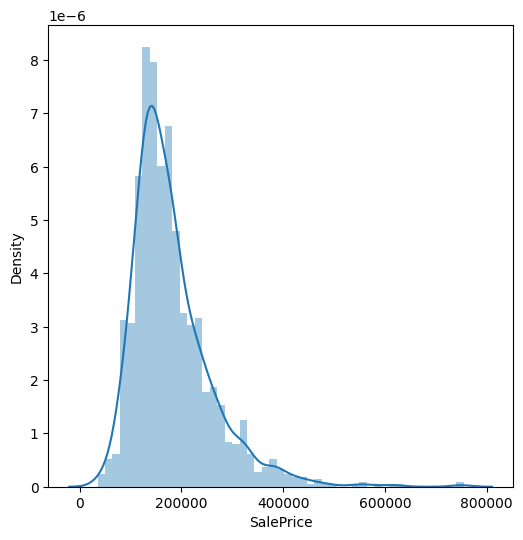

In [11]:
# check if traget variable 'SalePrice' is normally distributed
plt.figure(figsize=[6,6])
sns.distplot(housing['SalePrice'])
plt.show()

##### target variable SalePrice is right-skewed

In [12]:
print("skewness: ", housing['SalePrice'].skew())
print("kurtosis: ", housing['SalePrice'].kurt())

skewness:  1.8828757597682129
kurtosis:  6.536281860064529


### we can observe that target variable saleprice has skewness >1 and high density around

### hence we can do data transformation (logarithmic)

In [13]:
# log transformation
housing['SalePrice']=np.log(housing['SalePrice']) 

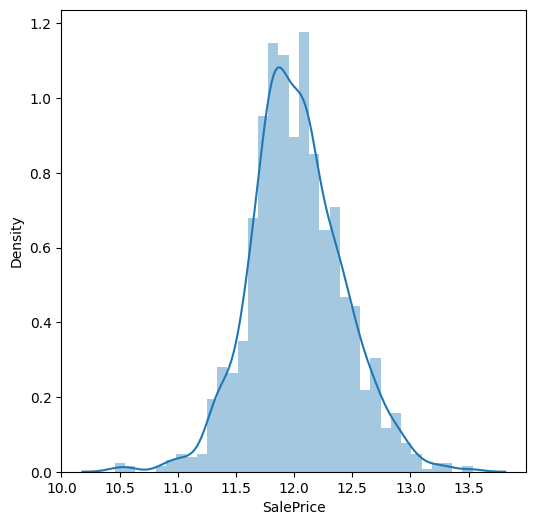

In [14]:
# check if traget variable 'SalePrice' is normally distributed 
# after log transformation
plt.figure(figsize=[6,6])
sns.distplot(housing['SalePrice'])
plt.show()

In [15]:
print("skewness: ", housing['SalePrice'].skew())
print("kurtosis: ", housing['SalePrice'].kurt())

skewness:  0.12133506220520406
kurtosis:  0.8095319958036296


### normal distribution and Skewness and Kurtosis reduced

- drop id column
- convert 'MSSubCkass', 'OverallQual', 'OverallCond' to object datatype
- convert 'LogFrontage','MassVArea' to numeric data type(int)

In [86]:
# housing.drop("Id", axis=1, inplace= True)
housing[[ 'MSSubClass', 'OverallQual', 'OverallCond']]=housing[[ 'MSSubClass', 'OverallQual', 'OverallCond']].astype('object')

In [85]:
housing['LotFrontage']= pd.to_numeric(housing['LotFrontage'], errors='coerce')
housing['MasVnrArea']= pd.to_numeric(housing['MasVnrArea'], errors='coerce')
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 79 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   object 
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1460 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          1460 non-null   object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   object 
 17  OverallCond    1460 non-null   object 
 18  YearRemo

In [18]:
null_cols = housing.columns[housing.isnull().any()]
null_cols

Index(['LotFrontage', 'MasVnrType', 'MasVnrArea', 'BsmtExposure', 'Electrical',
       'GarageYrBlt'],
      dtype='object')

In [19]:
for i in null_cols:
    if housing[i].dtype == np.float64 or housing[i].dtype==np.int64:
        housing[i].fillna(housing[i].mean(), inplace= True)
    else:
        housing[i].fillna(housing[i].mode()[0], inplace= True)
        

In [20]:
housing.isna().sum()

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
Alley            0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
MasVnrArea       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinSF1       0
BsmtFinType2     0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr

## step-3 Exploratory data analysis (EDA )

In [21]:
# list of categorial columns
cat_cols = housing.select_dtypes(include='object').columns
cat_cols

Index(['MSSubClass', 'MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour',
       'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu',
       'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive',
       'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition'],
      dtype='object')

In [22]:
# list of numeric columns
num_cols = housing.select_dtypes(include=['int64','float64']).columns
num_cols

Index(['Id', 'LotFrontage', 'LotArea', 'YearBuilt', 'YearRemodAdd',
       'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea',
       'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

### univariate analysis

Id


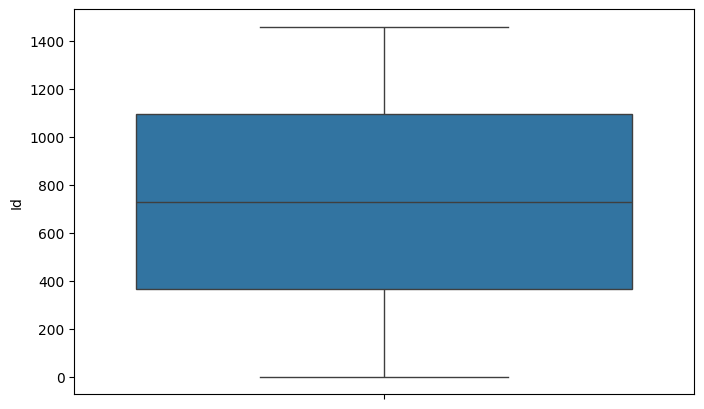

LotFrontage


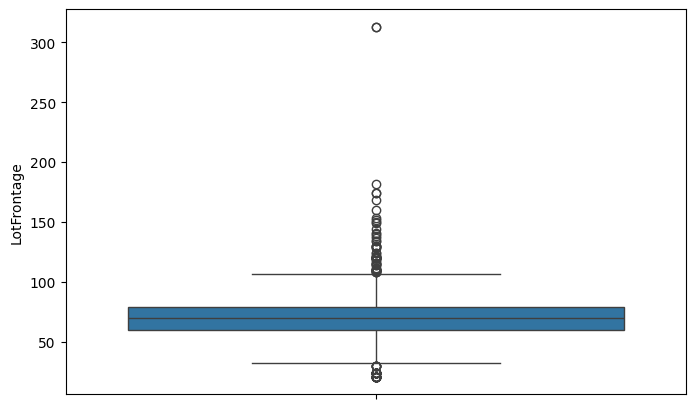

LotArea


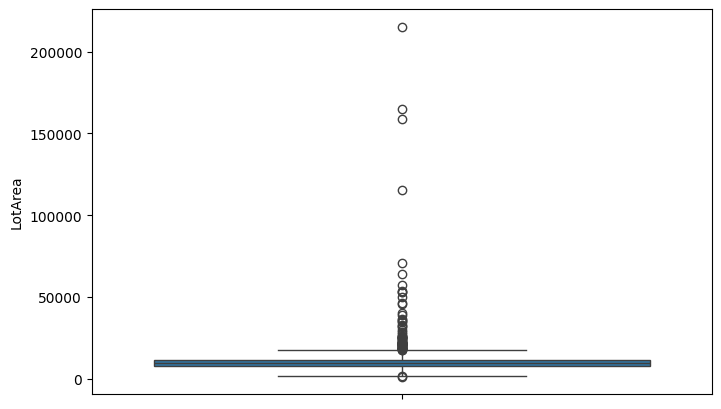

YearBuilt


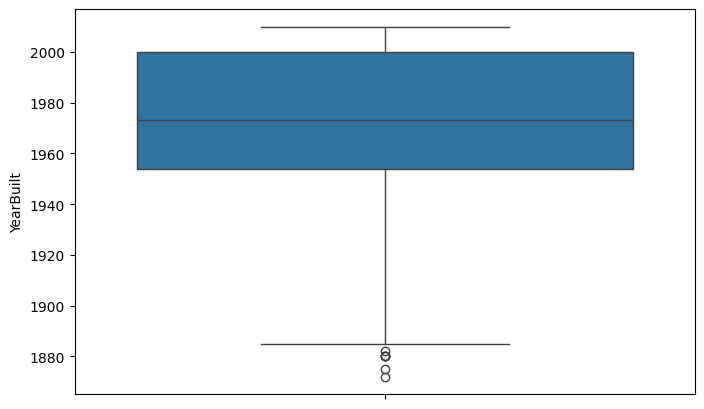

YearRemodAdd


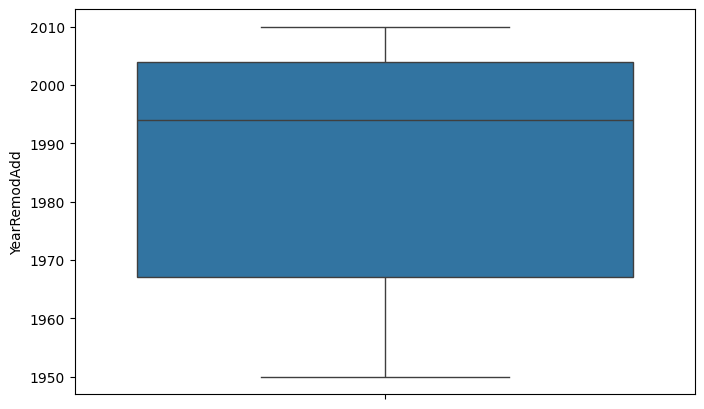

MasVnrArea


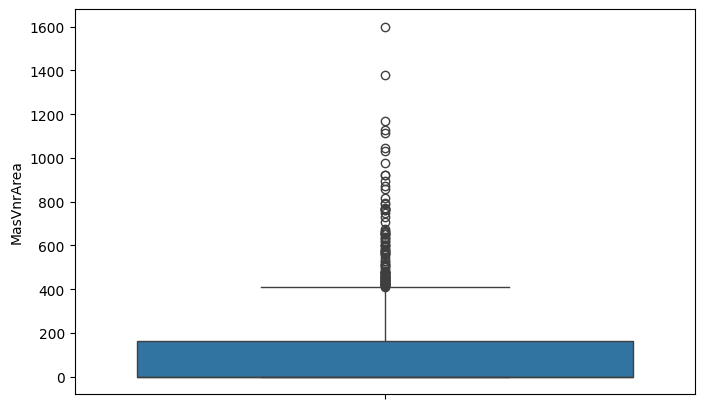

BsmtFinSF1


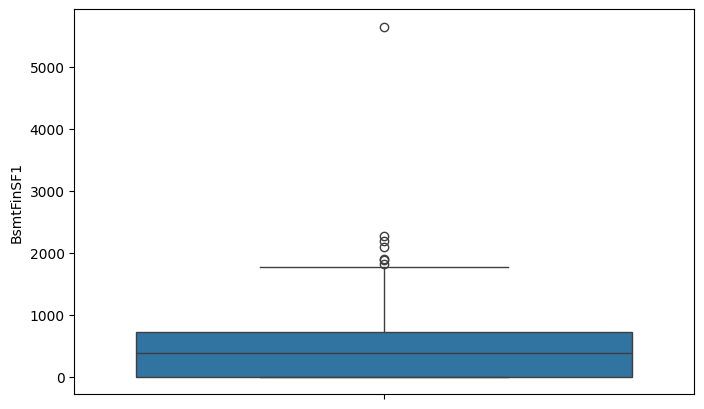

BsmtFinSF2


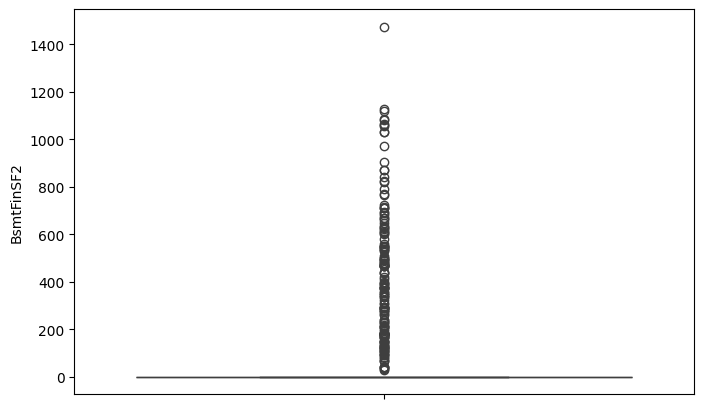

BsmtUnfSF


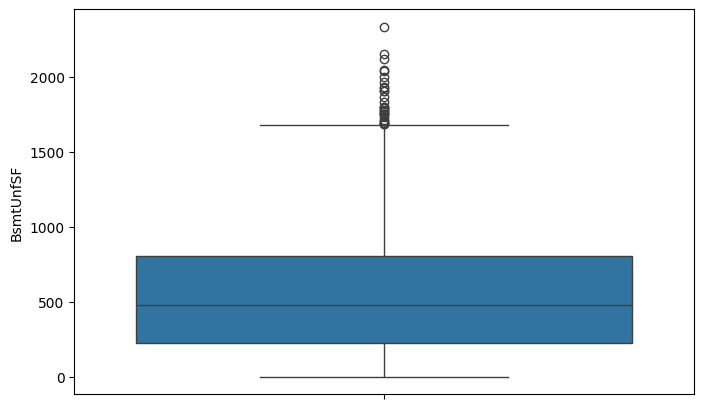

TotalBsmtSF


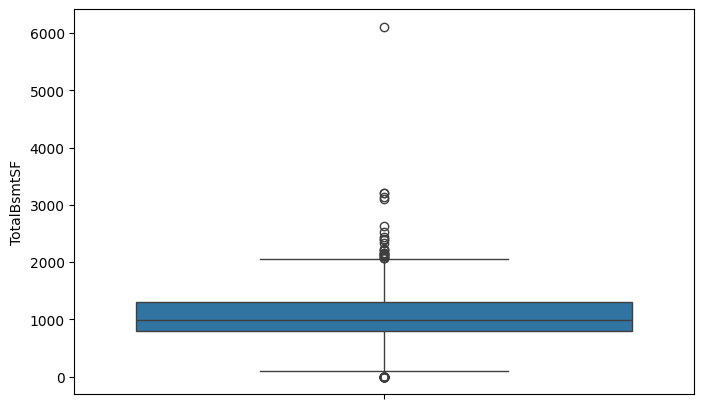

1stFlrSF


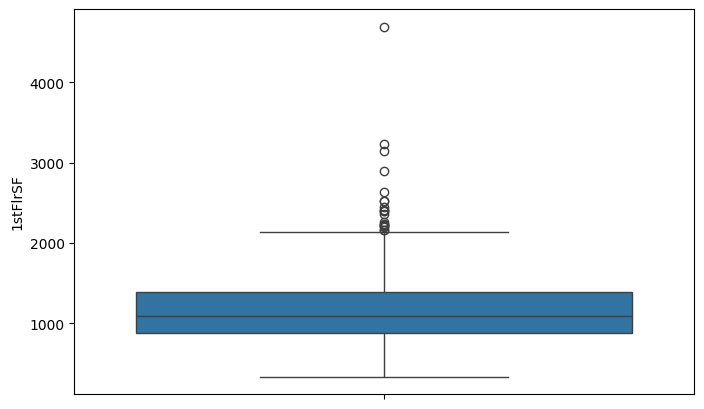

2ndFlrSF


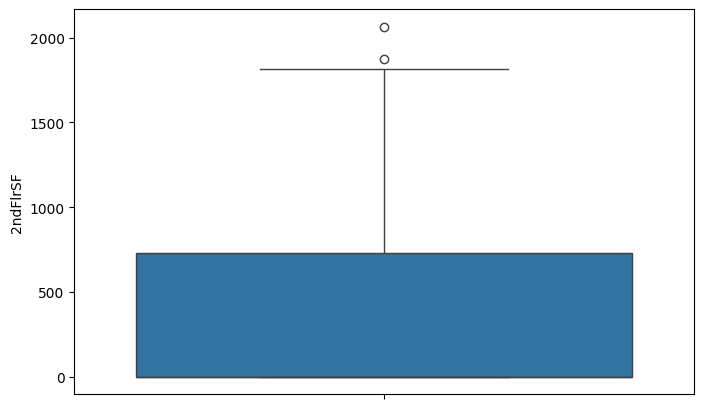

LowQualFinSF


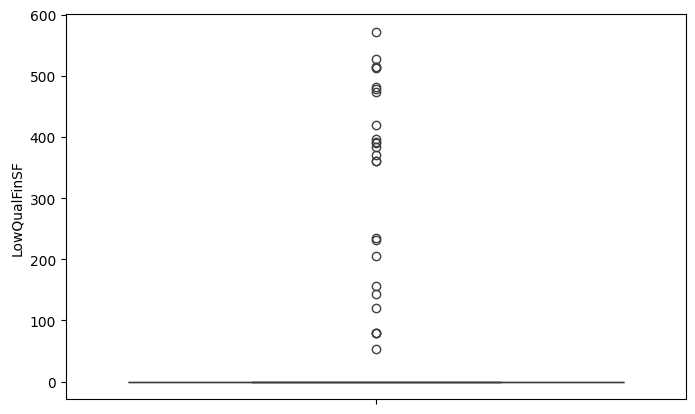

GrLivArea


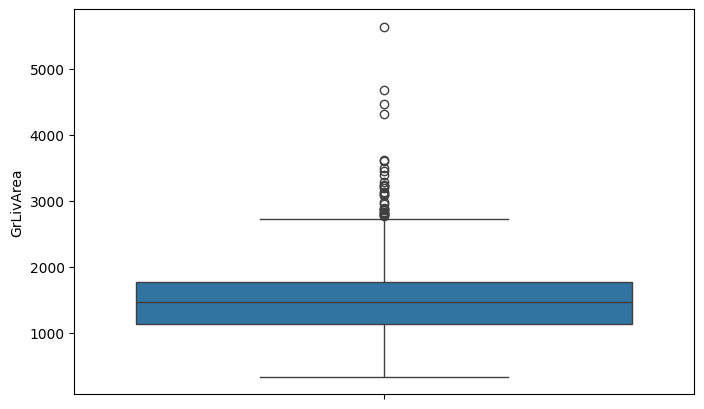

BsmtFullBath


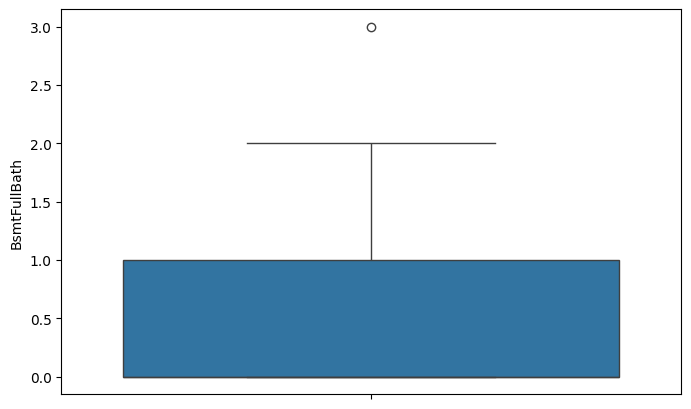

BsmtHalfBath


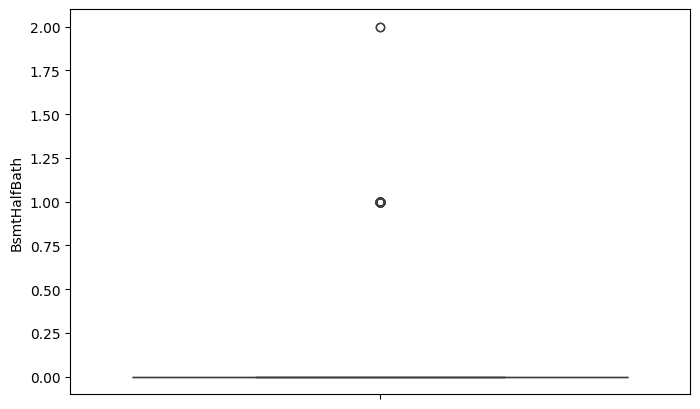

FullBath


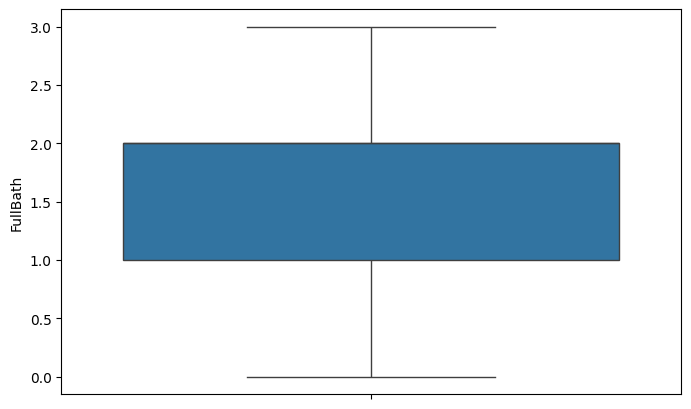

HalfBath


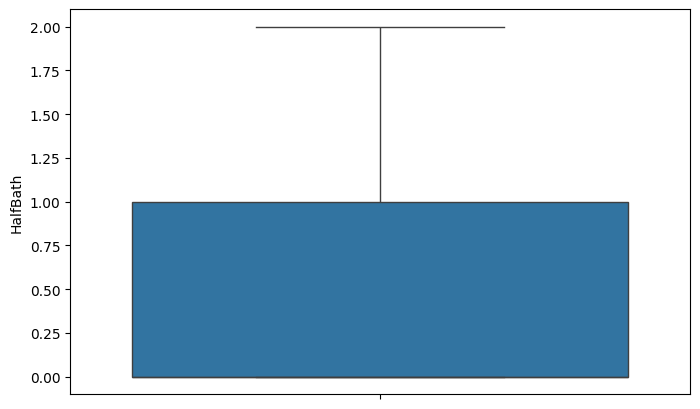

BedroomAbvGr


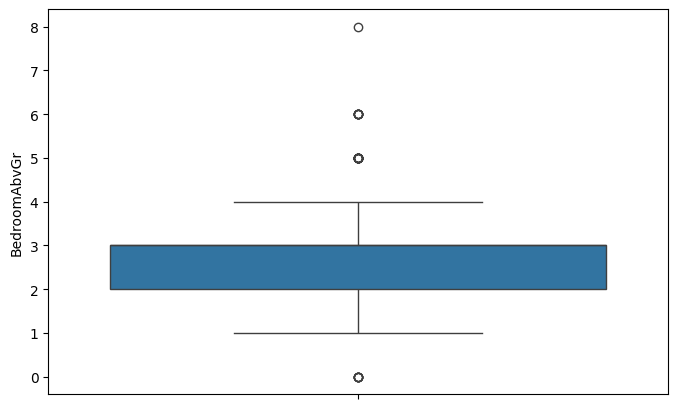

KitchenAbvGr


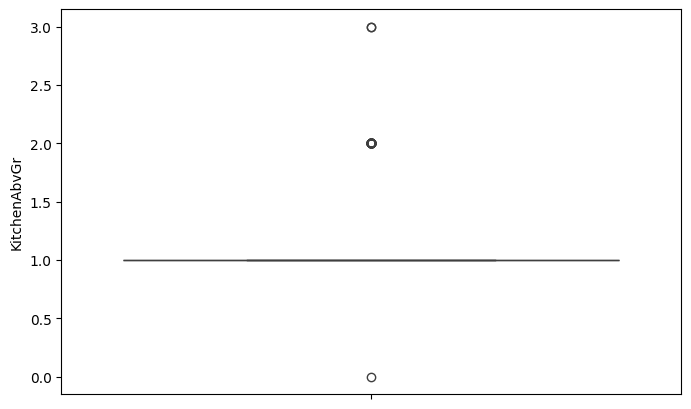

TotRmsAbvGrd


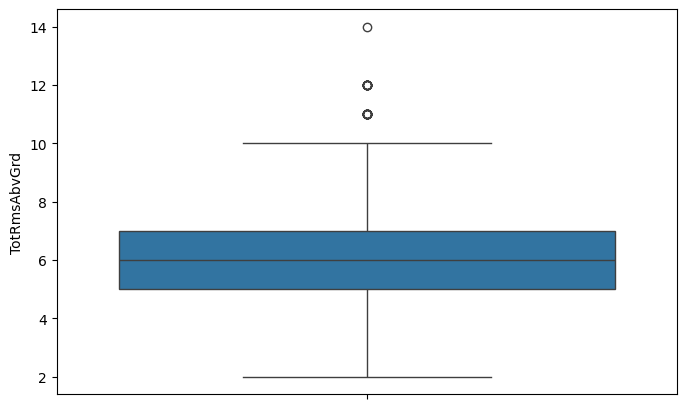

Fireplaces


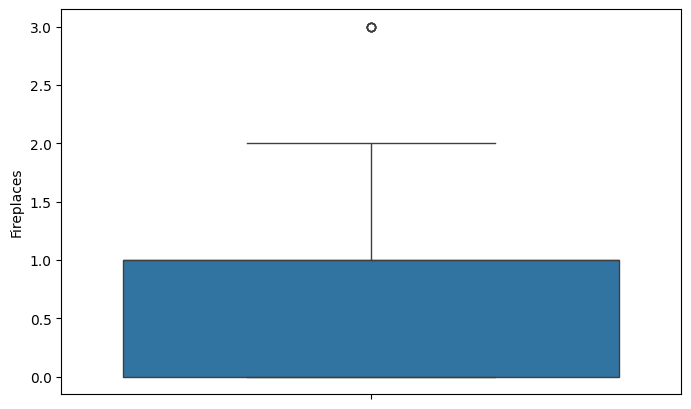

GarageYrBlt


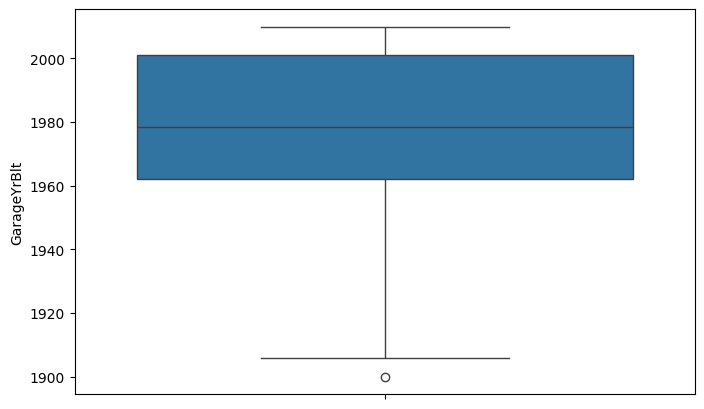

GarageCars


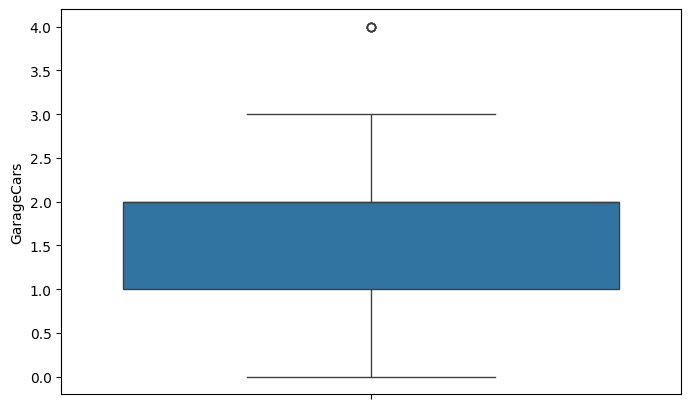

GarageArea


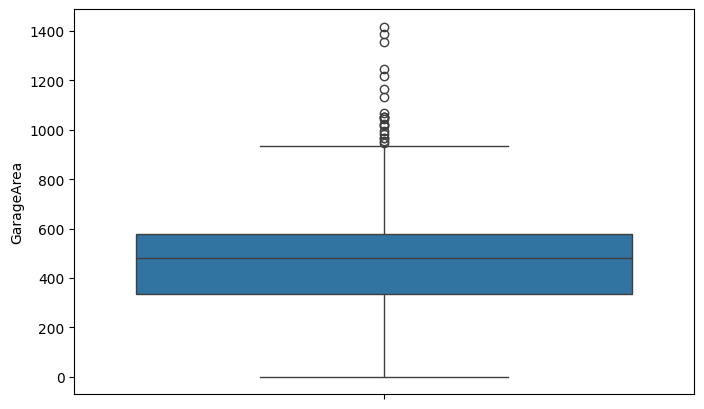

WoodDeckSF


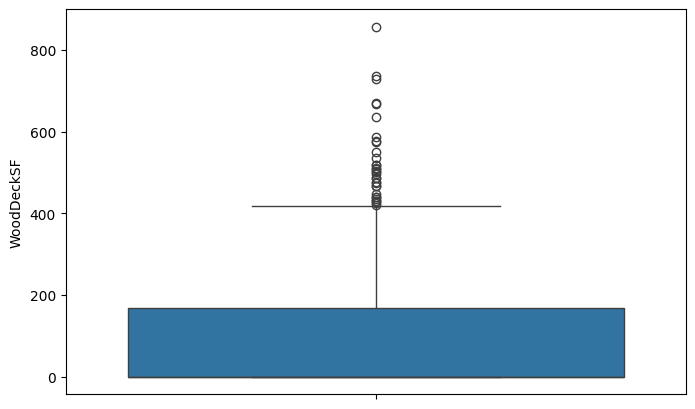

OpenPorchSF


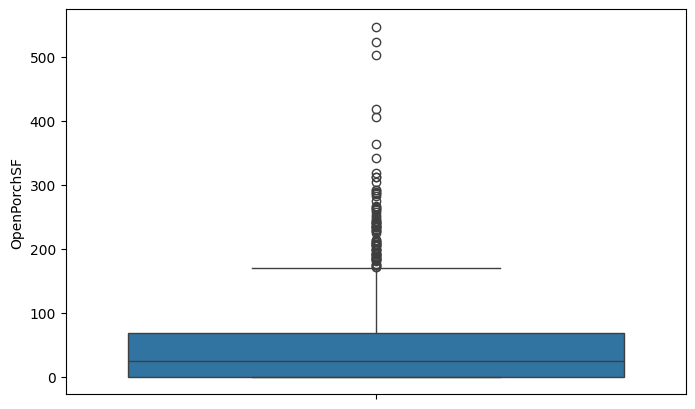

EnclosedPorch


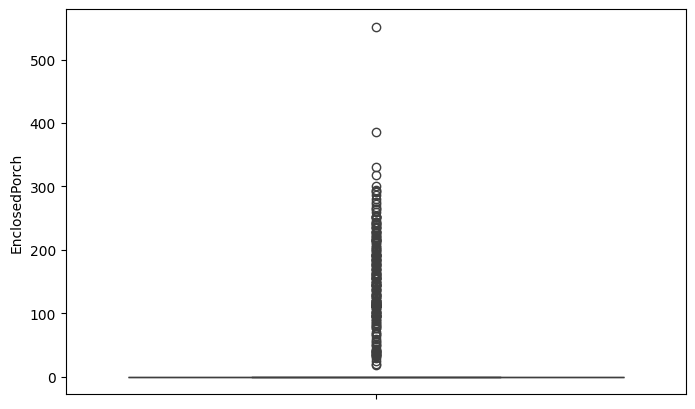

3SsnPorch


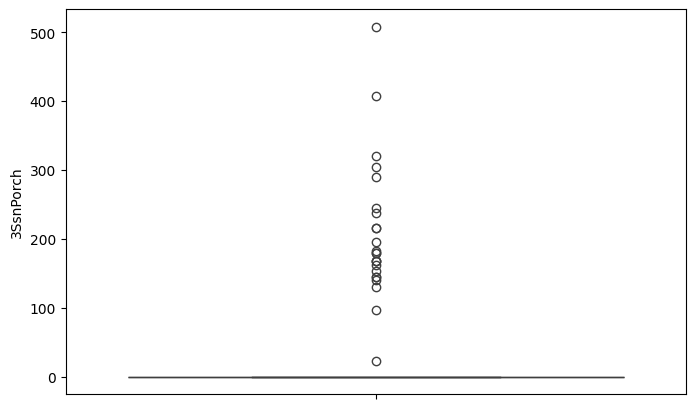

ScreenPorch


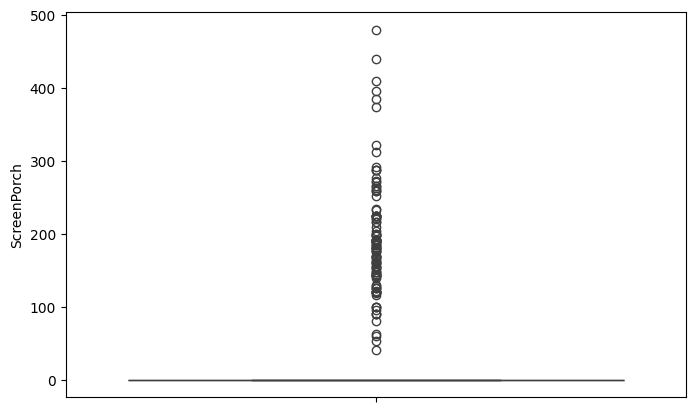

PoolArea


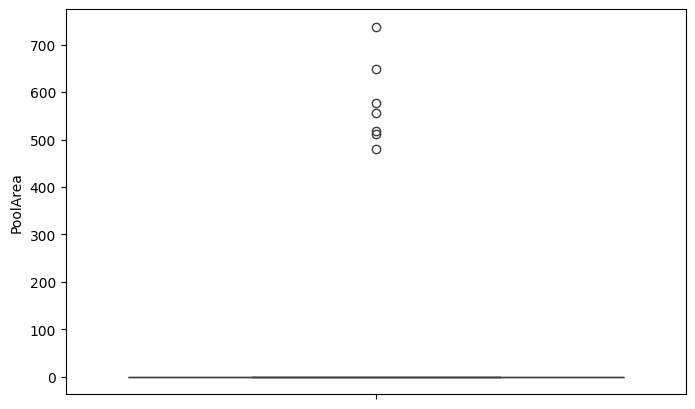

MiscVal


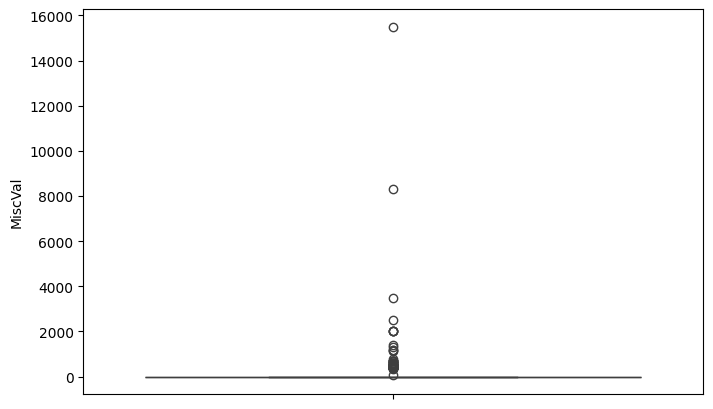

MoSold


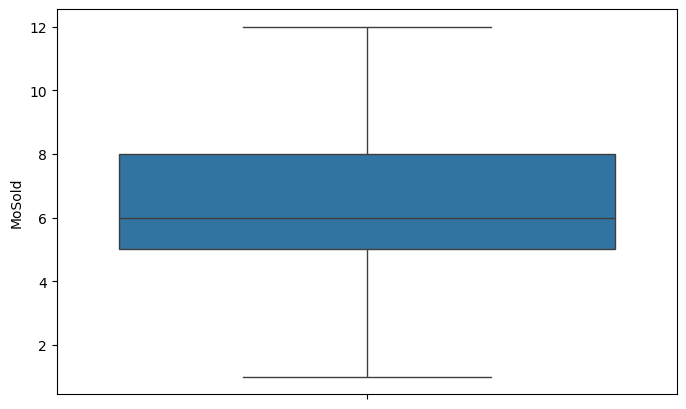

YrSold


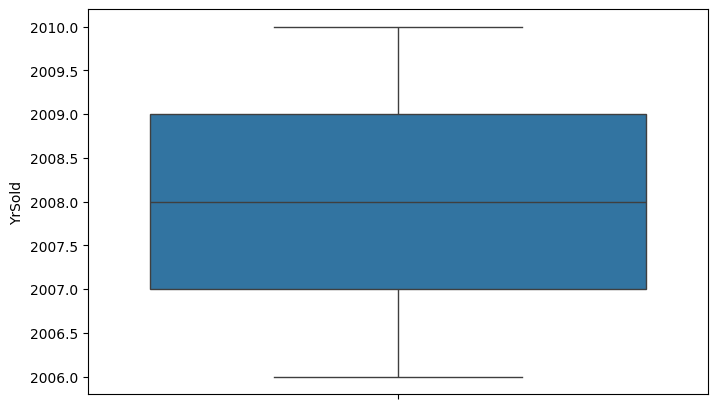

SalePrice


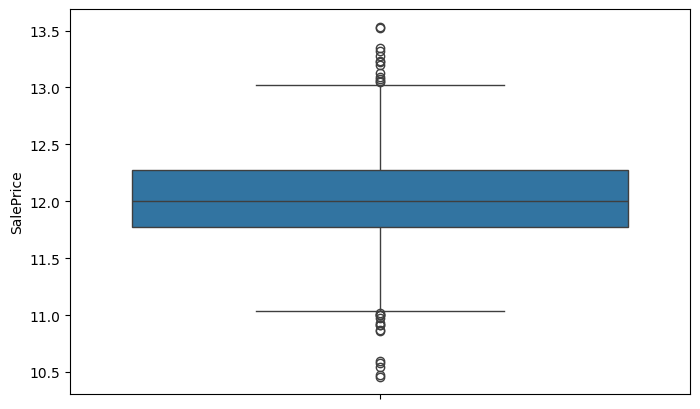

In [23]:
# numeric columns
# plotting box plots to visualize the distribution and check for outliers
for i in num_cols:
    plt.figure(figsize=[8,5])
    print(i)
    sns.boxplot(housing[i])
    plt.show()

#### outliers present in LotFrontage, LotArea, YearBuilt, MaxVNrArea, BsmtFinsSF1, BsmtFinSF2, BsmtUnfSF, etc..

MSSubClass
20     0.367123
60     0.204795
50     0.098630
120    0.059589
30     0.047260
160    0.043151
70     0.041096
80     0.039726
90     0.035616
190    0.020548
85     0.013699
75     0.010959
45     0.008219
180    0.006849
40     0.002740
Name: proportion, dtype: float64


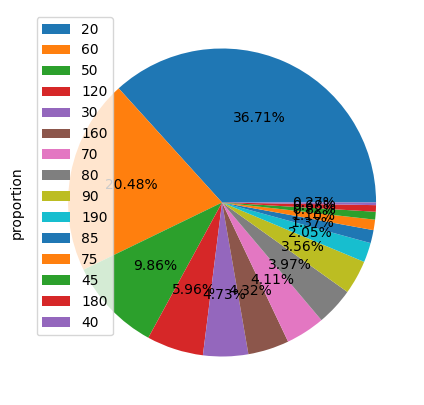

-------------------------------------------------------------------------------
MSZoning
RL         0.788356
RM         0.149315
FV         0.044521
RH         0.010959
C (all)    0.006849
Name: proportion, dtype: float64


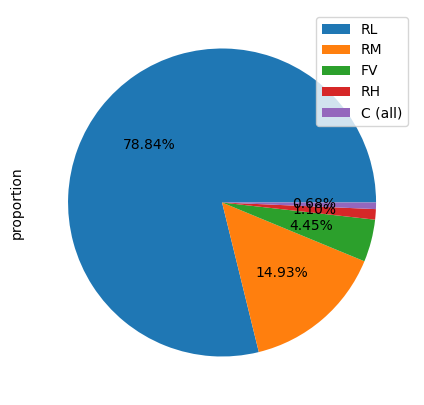

-------------------------------------------------------------------------------
Street
Pave    0.99589
Grvl    0.00411
Name: proportion, dtype: float64


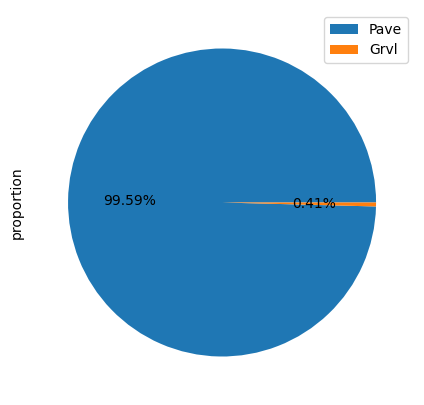

-------------------------------------------------------------------------------
Alley
None    0.937671
Grvl    0.034247
Pave    0.028082
Name: proportion, dtype: float64


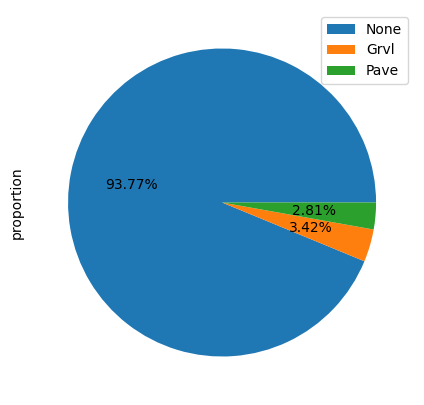

-------------------------------------------------------------------------------
LotShape
Reg    0.633562
IR1    0.331507
IR2    0.028082
IR3    0.006849
Name: proportion, dtype: float64


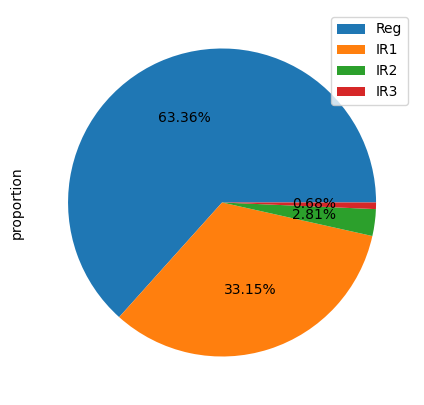

-------------------------------------------------------------------------------
LandContour
Lvl    0.897945
Bnk    0.043151
HLS    0.034247
Low    0.024658
Name: proportion, dtype: float64


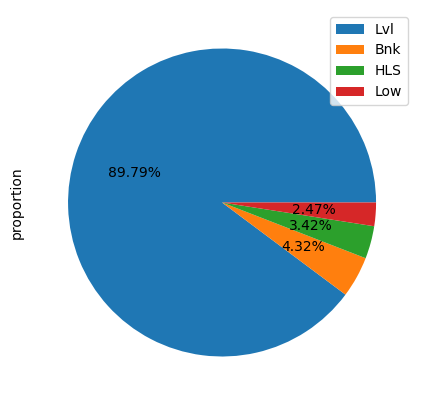

-------------------------------------------------------------------------------
Utilities
AllPub    0.999315
NoSeWa    0.000685
Name: proportion, dtype: float64


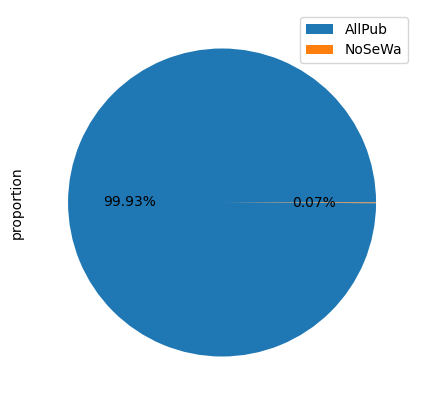

-------------------------------------------------------------------------------
LotConfig
Inside     0.720548
Corner     0.180137
CulDSac    0.064384
FR2        0.032192
FR3        0.002740
Name: proportion, dtype: float64


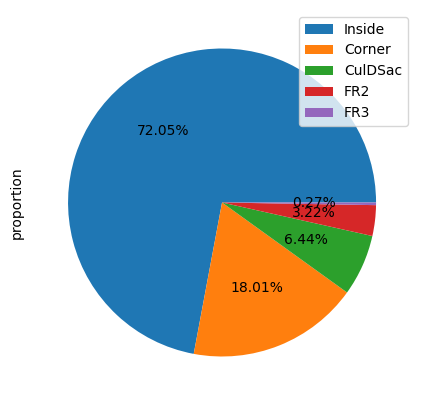

-------------------------------------------------------------------------------
LandSlope
Gtl    0.946575
Mod    0.044521
Sev    0.008904
Name: proportion, dtype: float64


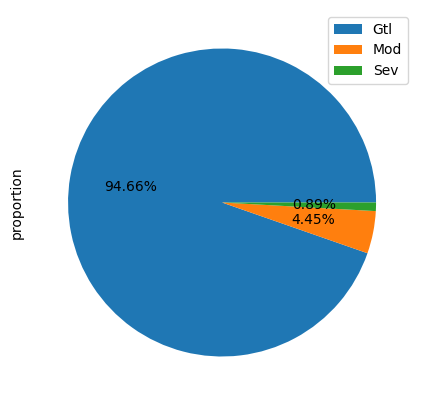

-------------------------------------------------------------------------------
Neighborhood
NAmes      0.154110
CollgCr    0.102740
OldTown    0.077397
Edwards    0.068493
Somerst    0.058904
Gilbert    0.054110
NridgHt    0.052740
Sawyer     0.050685
NWAmes     0.050000
SawyerW    0.040411
BrkSide    0.039726
Crawfor    0.034932
Mitchel    0.033562
NoRidge    0.028082
Timber     0.026027
IDOTRR     0.025342
ClearCr    0.019178
SWISU      0.017123
StoneBr    0.017123
Blmngtn    0.011644
MeadowV    0.011644
BrDale     0.010959
Veenker    0.007534
NPkVill    0.006164
Blueste    0.001370
Name: proportion, dtype: float64


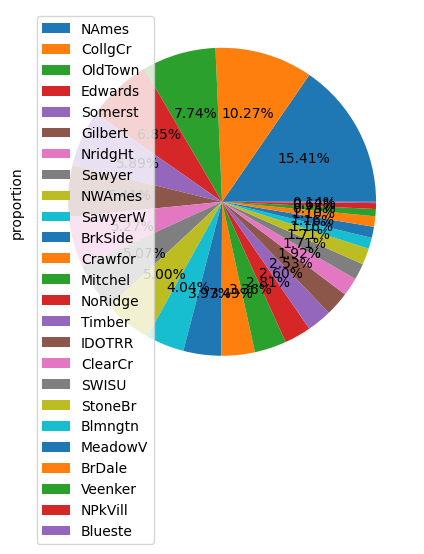

-------------------------------------------------------------------------------
Condition1
Norm      0.863014
Feedr     0.055479
Artery    0.032877
RRAn      0.017808
PosN      0.013014
RRAe      0.007534
PosA      0.005479
RRNn      0.003425
RRNe      0.001370
Name: proportion, dtype: float64


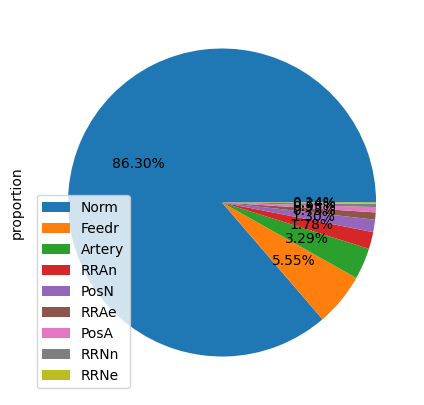

-------------------------------------------------------------------------------
Condition2
Norm      0.989726
Feedr     0.004110
Artery    0.001370
RRNn      0.001370
PosN      0.001370
PosA      0.000685
RRAn      0.000685
RRAe      0.000685
Name: proportion, dtype: float64


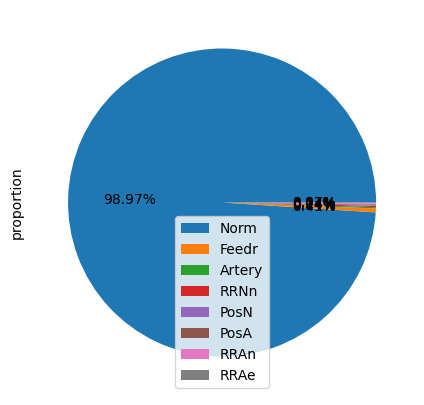

-------------------------------------------------------------------------------
BldgType
1Fam      0.835616
TwnhsE    0.078082
Duplex    0.035616
Twnhs     0.029452
2fmCon    0.021233
Name: proportion, dtype: float64


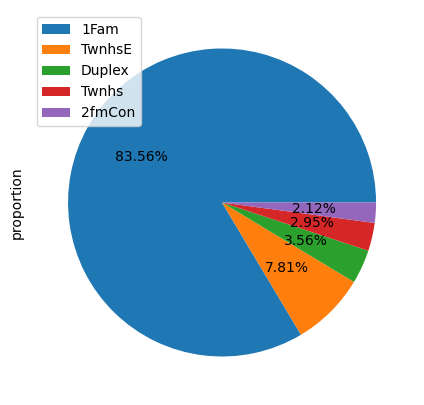

-------------------------------------------------------------------------------
HouseStyle
1Story    0.497260
2Story    0.304795
1.5Fin    0.105479
SLvl      0.044521
SFoyer    0.025342
1.5Unf    0.009589
2.5Unf    0.007534
2.5Fin    0.005479
Name: proportion, dtype: float64


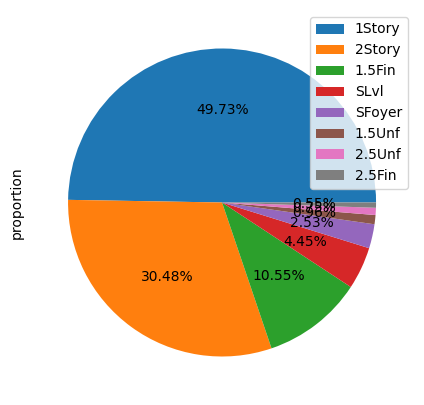

-------------------------------------------------------------------------------
OverallQual
5     0.271918
6     0.256164
7     0.218493
8     0.115068
4     0.079452
9     0.029452
3     0.013699
10    0.012329
2     0.002055
1     0.001370
Name: proportion, dtype: float64


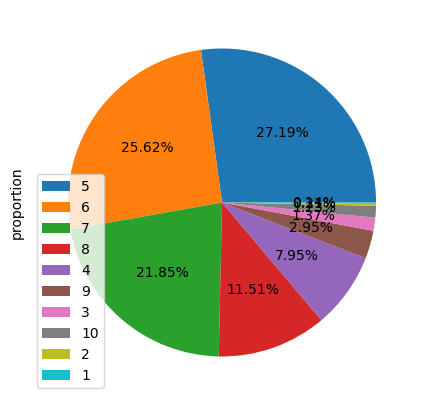

-------------------------------------------------------------------------------
OverallCond
5    0.562329
6    0.172603
7    0.140411
8    0.049315
4    0.039041
3    0.017123
9    0.015068
2    0.003425
1    0.000685
Name: proportion, dtype: float64


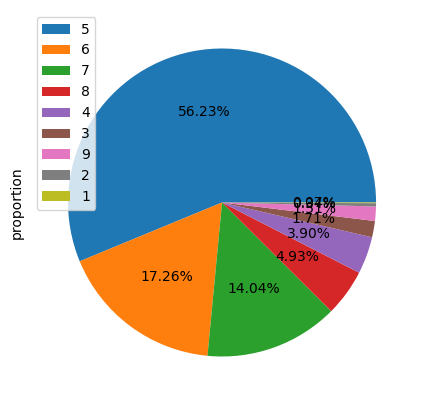

-------------------------------------------------------------------------------
RoofStyle
Gable      0.781507
Hip        0.195890
Flat       0.008904
Gambrel    0.007534
Mansard    0.004795
Shed       0.001370
Name: proportion, dtype: float64


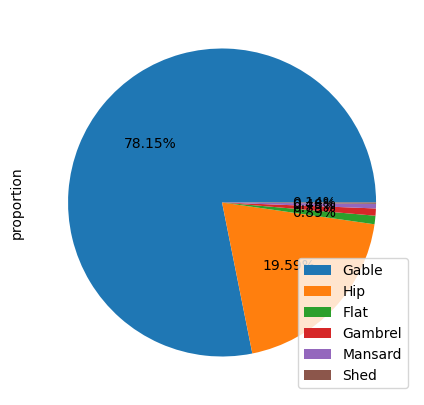

-------------------------------------------------------------------------------
RoofMatl
CompShg    0.982192
Tar&Grv    0.007534
WdShngl    0.004110
WdShake    0.003425
Metal      0.000685
Membran    0.000685
Roll       0.000685
ClyTile    0.000685
Name: proportion, dtype: float64


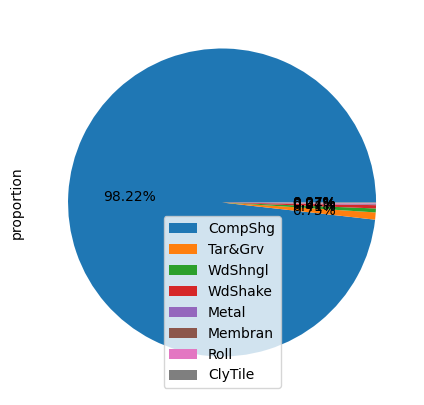

-------------------------------------------------------------------------------
Exterior1st
VinylSd    0.352740
HdBoard    0.152055
MetalSd    0.150685
Wd Sdng    0.141096
Plywood    0.073973
CemntBd    0.041781
BrkFace    0.034247
WdShing    0.017808
Stucco     0.017123
AsbShng    0.013699
BrkComm    0.001370
Stone      0.001370
AsphShn    0.000685
ImStucc    0.000685
CBlock     0.000685
Name: proportion, dtype: float64


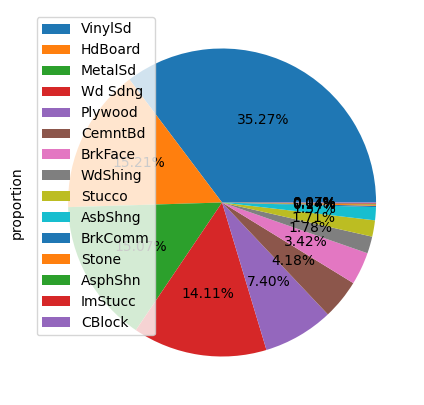

-------------------------------------------------------------------------------
Exterior2nd
VinylSd    0.345205
MetalSd    0.146575
HdBoard    0.141781
Wd Sdng    0.134932
Plywood    0.097260
CmentBd    0.041096
Wd Shng    0.026027
Stucco     0.017808
BrkFace    0.017123
AsbShng    0.013699
ImStucc    0.006849
Brk Cmn    0.004795
Stone      0.003425
AsphShn    0.002055
Other      0.000685
CBlock     0.000685
Name: proportion, dtype: float64


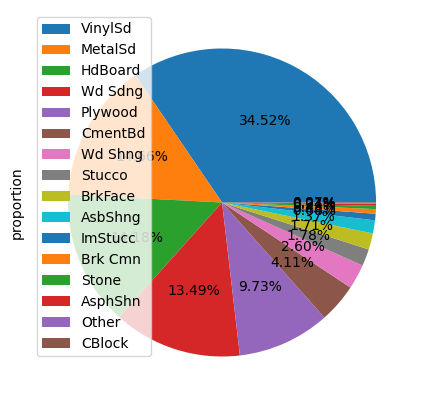

-------------------------------------------------------------------------------
MasVnrType
BrkFace    0.902055
Stone      0.087671
BrkCmn     0.010274
Name: proportion, dtype: float64


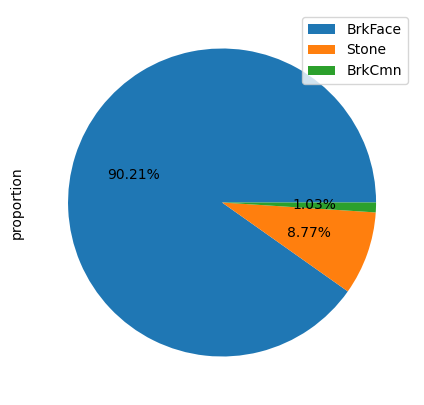

-------------------------------------------------------------------------------
ExterQual
TA    0.620548
Gd    0.334247
Ex    0.035616
Fa    0.009589
Name: proportion, dtype: float64


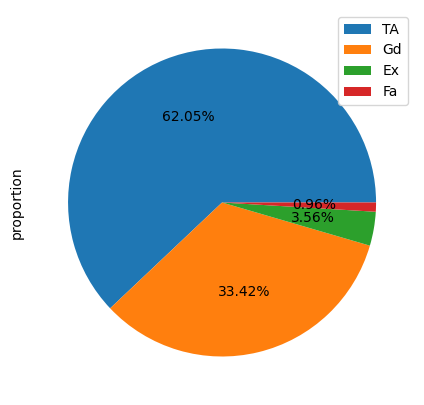

-------------------------------------------------------------------------------
ExterCond
TA    0.878082
Gd    0.100000
Fa    0.019178
Ex    0.002055
Po    0.000685
Name: proportion, dtype: float64


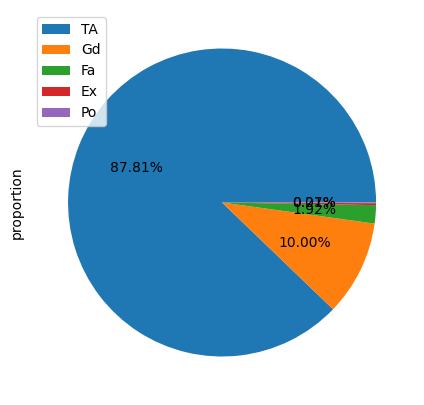

-------------------------------------------------------------------------------
Foundation
PConc     0.443151
CBlock    0.434247
BrkTil    0.100000
Slab      0.016438
Stone     0.004110
Wood      0.002055
Name: proportion, dtype: float64


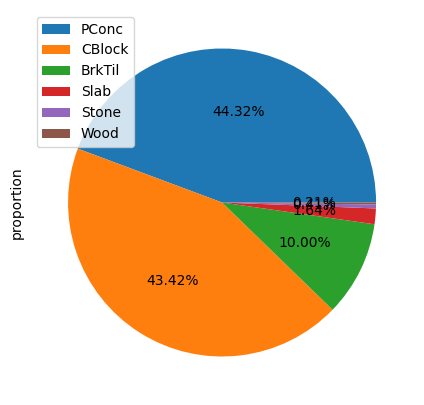

-------------------------------------------------------------------------------
BsmtQual
TA      0.444521
Gd      0.423288
Ex      0.082877
None    0.025342
Fa      0.023973
Name: proportion, dtype: float64


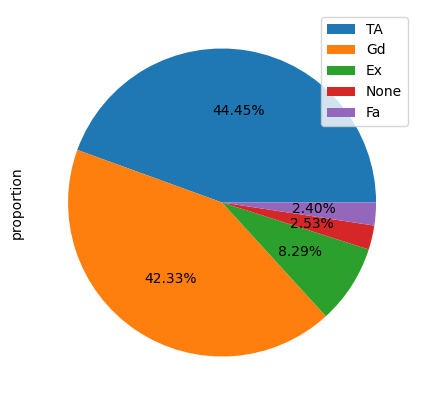

-------------------------------------------------------------------------------
BsmtCond
TA      0.897945
Gd      0.044521
Fa      0.030822
None    0.025342
Po      0.001370
Name: proportion, dtype: float64


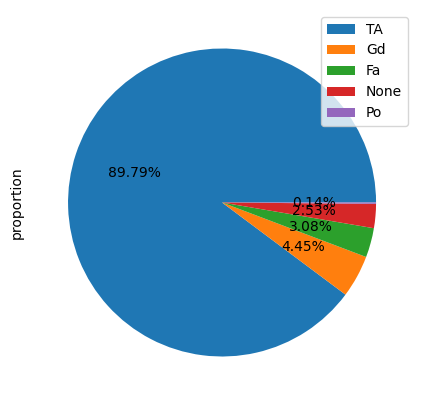

-------------------------------------------------------------------------------
BsmtExposure
No    0.678767
Av    0.151370
Gd    0.091781
Mn    0.078082
Name: proportion, dtype: float64


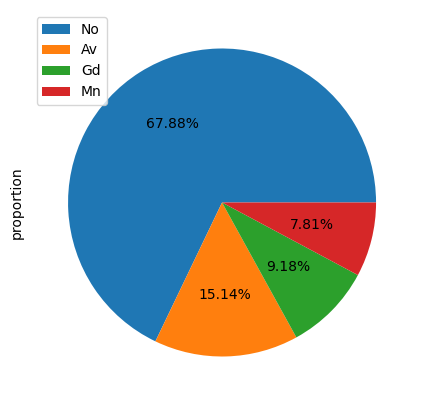

-------------------------------------------------------------------------------
BsmtFinType1
Unf     0.294521
GLQ     0.286301
ALQ     0.150685
BLQ     0.101370
Rec     0.091096
LwQ     0.050685
None    0.025342
Name: proportion, dtype: float64


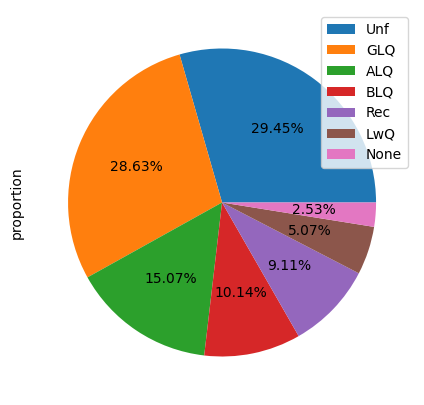

-------------------------------------------------------------------------------
BsmtFinType2
Unf     0.860274
Rec     0.036986
LwQ     0.031507
None    0.026027
BLQ     0.022603
ALQ     0.013014
GLQ     0.009589
Name: proportion, dtype: float64


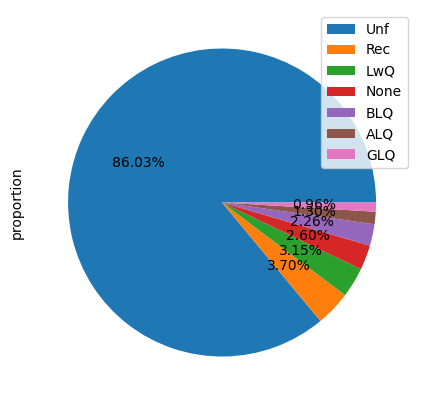

-------------------------------------------------------------------------------
Heating
GasA     0.978082
GasW     0.012329
Grav     0.004795
Wall     0.002740
OthW     0.001370
Floor    0.000685
Name: proportion, dtype: float64


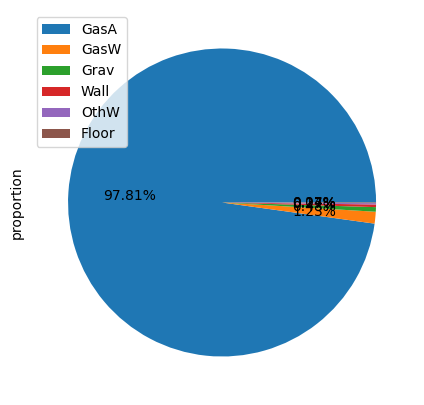

-------------------------------------------------------------------------------
HeatingQC
Ex    0.507534
TA    0.293151
Gd    0.165068
Fa    0.033562
Po    0.000685
Name: proportion, dtype: float64


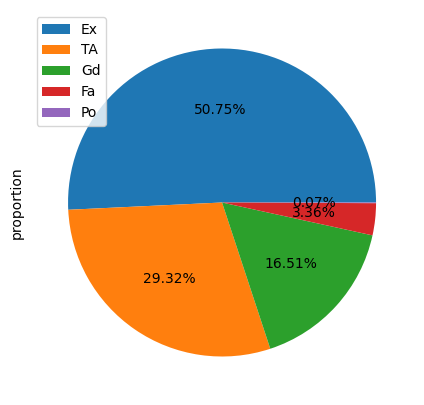

-------------------------------------------------------------------------------
CentralAir
Y    0.934932
N    0.065068
Name: proportion, dtype: float64


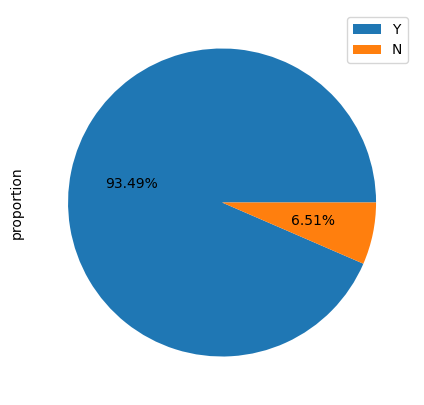

-------------------------------------------------------------------------------
Electrical
SBrkr    0.914384
FuseA    0.064384
FuseF    0.018493
FuseP    0.002055
Mix      0.000685
Name: proportion, dtype: float64


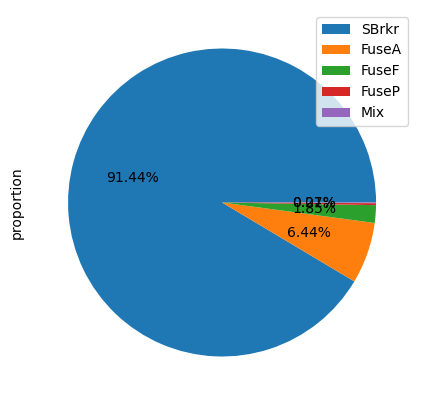

-------------------------------------------------------------------------------
KitchenQual
TA    0.503425
Gd    0.401370
Ex    0.068493
Fa    0.026712
Name: proportion, dtype: float64


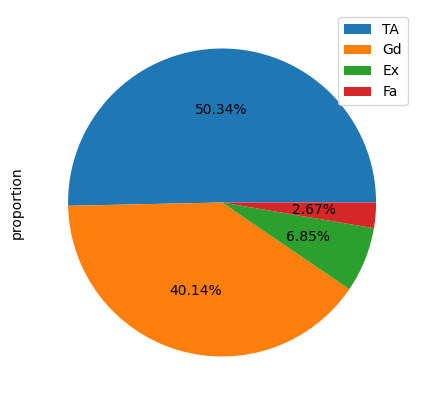

-------------------------------------------------------------------------------
Functional
Typ     0.931507
Min2    0.023288
Min1    0.021233
Mod     0.010274
Maj1    0.009589
Maj2    0.003425
Sev     0.000685
Name: proportion, dtype: float64


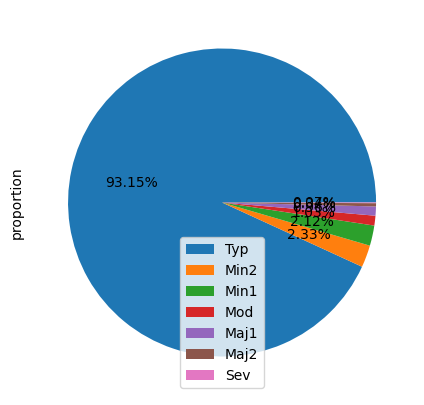

-------------------------------------------------------------------------------
FireplaceQu
None    0.472603
Gd      0.260274
TA      0.214384
Fa      0.022603
Ex      0.016438
Po      0.013699
Name: proportion, dtype: float64


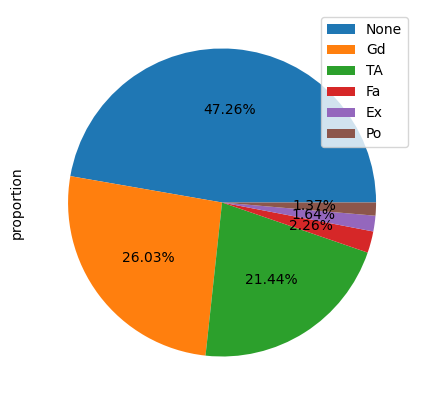

-------------------------------------------------------------------------------
GarageType
Attchd     0.595890
Detchd     0.265068
BuiltIn    0.060274
None       0.055479
Basment    0.013014
CarPort    0.006164
2Types     0.004110
Name: proportion, dtype: float64


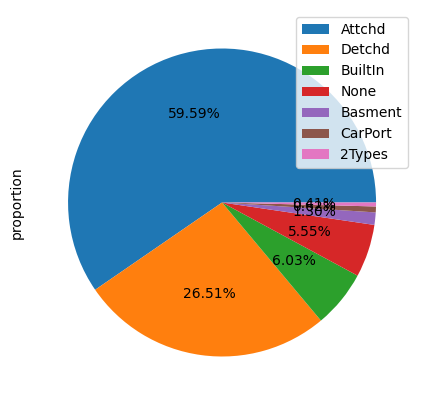

-------------------------------------------------------------------------------
GarageFinish
Unf     0.414384
RFn     0.289041
Fin     0.241096
None    0.055479
Name: proportion, dtype: float64


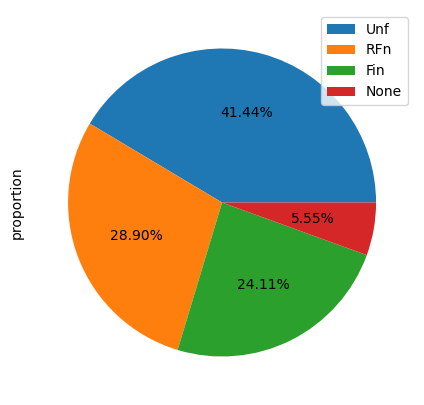

-------------------------------------------------------------------------------
GarageQual
TA      0.897945
None    0.055479
Fa      0.032877
Gd      0.009589
Ex      0.002055
Po      0.002055
Name: proportion, dtype: float64


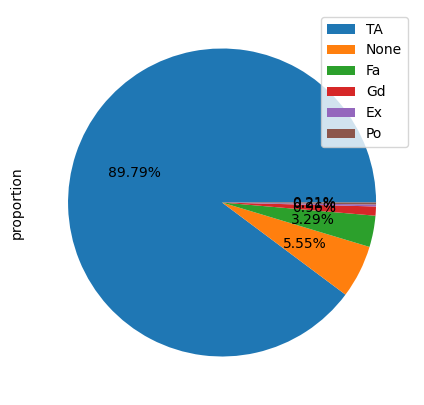

-------------------------------------------------------------------------------
GarageCond
TA      0.908219
None    0.055479
Fa      0.023973
Gd      0.006164
Po      0.004795
Ex      0.001370
Name: proportion, dtype: float64


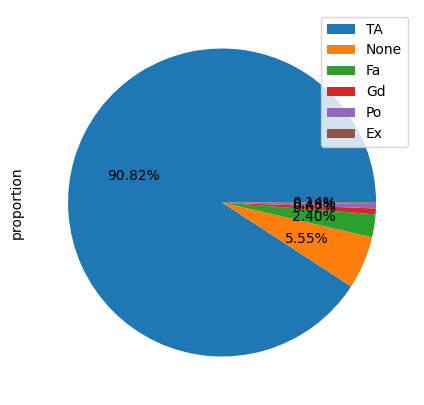

-------------------------------------------------------------------------------
PavedDrive
Y    0.917808
N    0.061644
P    0.020548
Name: proportion, dtype: float64


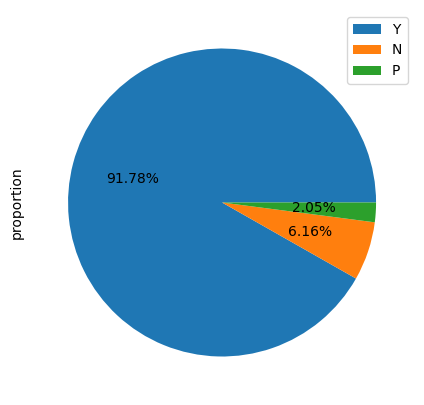

-------------------------------------------------------------------------------
PoolQC
None    0.995205
Gd      0.002055
Ex      0.001370
Fa      0.001370
Name: proportion, dtype: float64


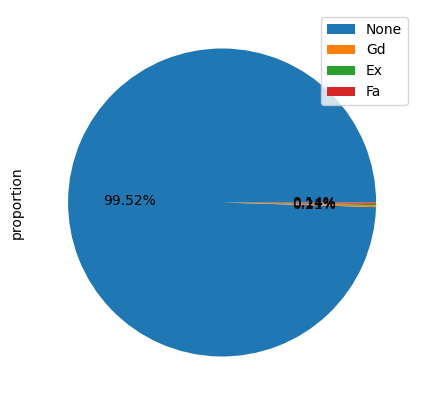

-------------------------------------------------------------------------------
Fence
None     0.807534
MnPrv    0.107534
GdPrv    0.040411
GdWo     0.036986
MnWw     0.007534
Name: proportion, dtype: float64


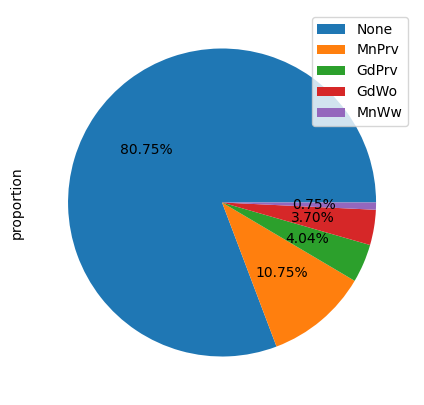

-------------------------------------------------------------------------------
MiscFeature
None    0.963014
Shed    0.033562
Gar2    0.001370
Othr    0.001370
TenC    0.000685
Name: proportion, dtype: float64


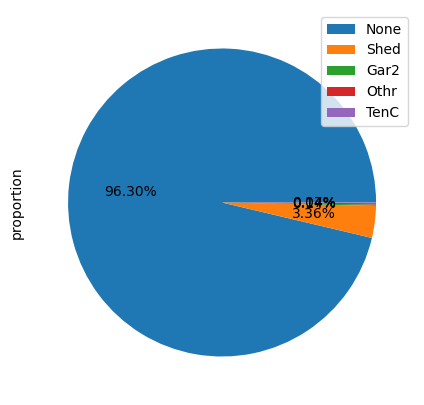

-------------------------------------------------------------------------------
SaleType
WD       0.867808
New      0.083562
COD      0.029452
ConLD    0.006164
ConLI    0.003425
ConLw    0.003425
CWD      0.002740
Oth      0.002055
Con      0.001370
Name: proportion, dtype: float64


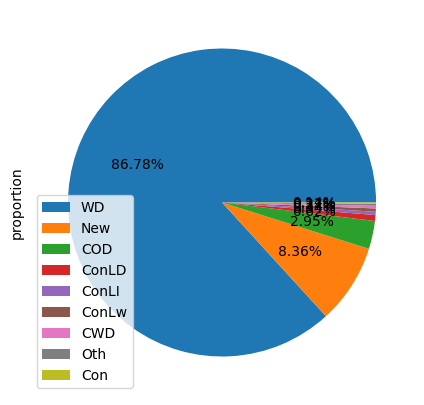

-------------------------------------------------------------------------------
SaleCondition
Normal     0.820548
Partial    0.085616
Abnorml    0.069178
Family     0.013699
Alloca     0.008219
AdjLand    0.002740
Name: proportion, dtype: float64


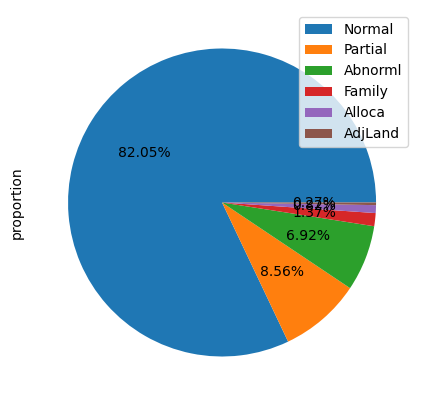

-------------------------------------------------------------------------------


In [24]:
# categorial columns
# plotting pie plots to visualize value distribtuion in each category
for i in cat_cols:
    print(housing[i].value_counts(normalize=True))
    plt.figure(figsize=[5,5])
    housing[i].value_counts(normalize=True).plot.pie(labeldistance=None, autopct='%1.2F%%')
    plt.legend()
    plt.show()
    print("-------------------------------------------------------------------------------")

##### >we can look percentage of vaules in category of columns nd infer that 'MSZoning, 'Street', 'LandContour', 'Utilities', LotConfig, LandSlope, Condition1, Condition2, BlgdType, RoofStyle etc., columns are having more than 75% of a distribution in a single category

### BiVariate/Mulrivariate Analysis 

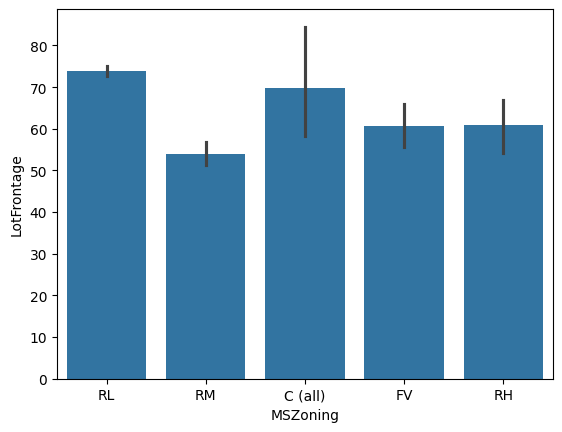

In [25]:
# plot of MSZoning vs LotFrontage
sns.barplot(x='MSZoning', y='LotFrontage', data=housing)
plt.show()

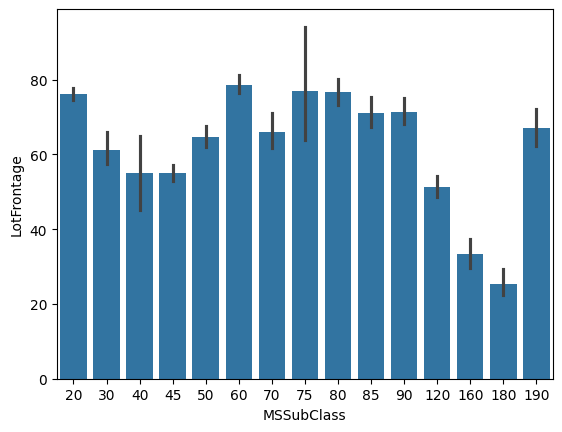

In [26]:
# plot of MSSubclass vs LotFrontage
sns.barplot(x='MSSubClass', y='LotFrontage', data=housing)
plt.show()

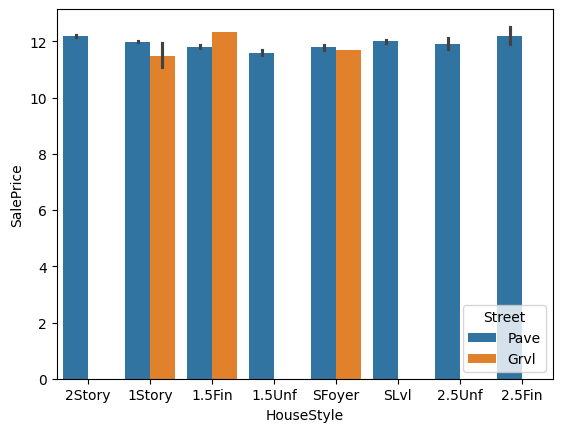

In [27]:
# plot of HouseStyle vs SalePrice based on Street
sns.barplot(x='HouseStyle', y='SalePrice', hue='Street', data=housing)
plt.show()

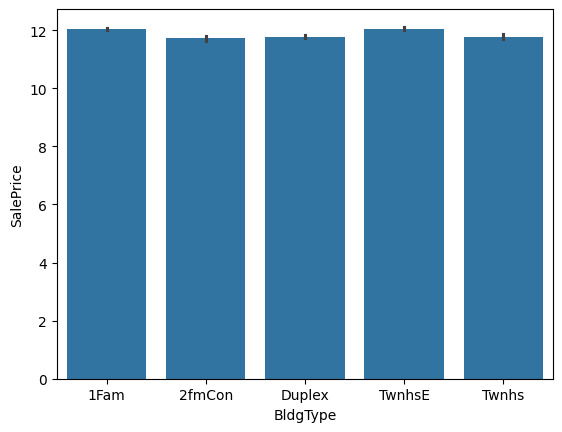

In [28]:
# plot of BldgType vs SalePrice
sns.barplot(x='BldgType', y='SalePrice', data=housing)
plt.show()

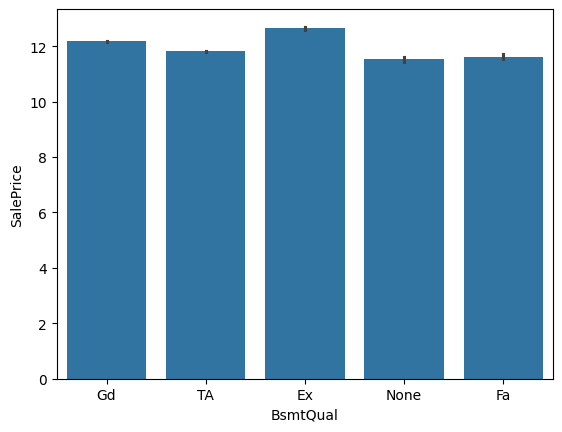

In [29]:
# plot of BSmtQual vs SalePrice 
sns.barplot(x='BsmtQual', y='SalePrice', data=housing)
plt.show()

### Conclusion : 
- RL(Residential Low Density) has the highest lot frontage and RM(Residential Medium Density) has the least 
- 2 STOReY 1946 8 NEWER has the highest lot frontage and PUD MULTILEVEL INCL SPLIT LEV/FOYER has the least 
- The SalePrice Is not showing much variance with respect to the Style of dwelling(one storey/two storey) 
- The SalePrice Is almost same for all the Building Types(Type of dwelling) and the basement quality, so there is no significant pattern 



In [30]:
#calculating age of property
housing['Age']=housing['YrSold'] - housing['YearBuilt']
housing['Age'].head()

0     5
1    31
2     7
3    91
4     8
Name: Age, dtype: int64

In [31]:
# drop yrSold and YearBuilt
housing.drop(columns=['YearBuilt','YrSold'], axis=1, inplace=True)

### correlation between numeric columns

Text(0.5, 1.0, 'correlation of numeric values')

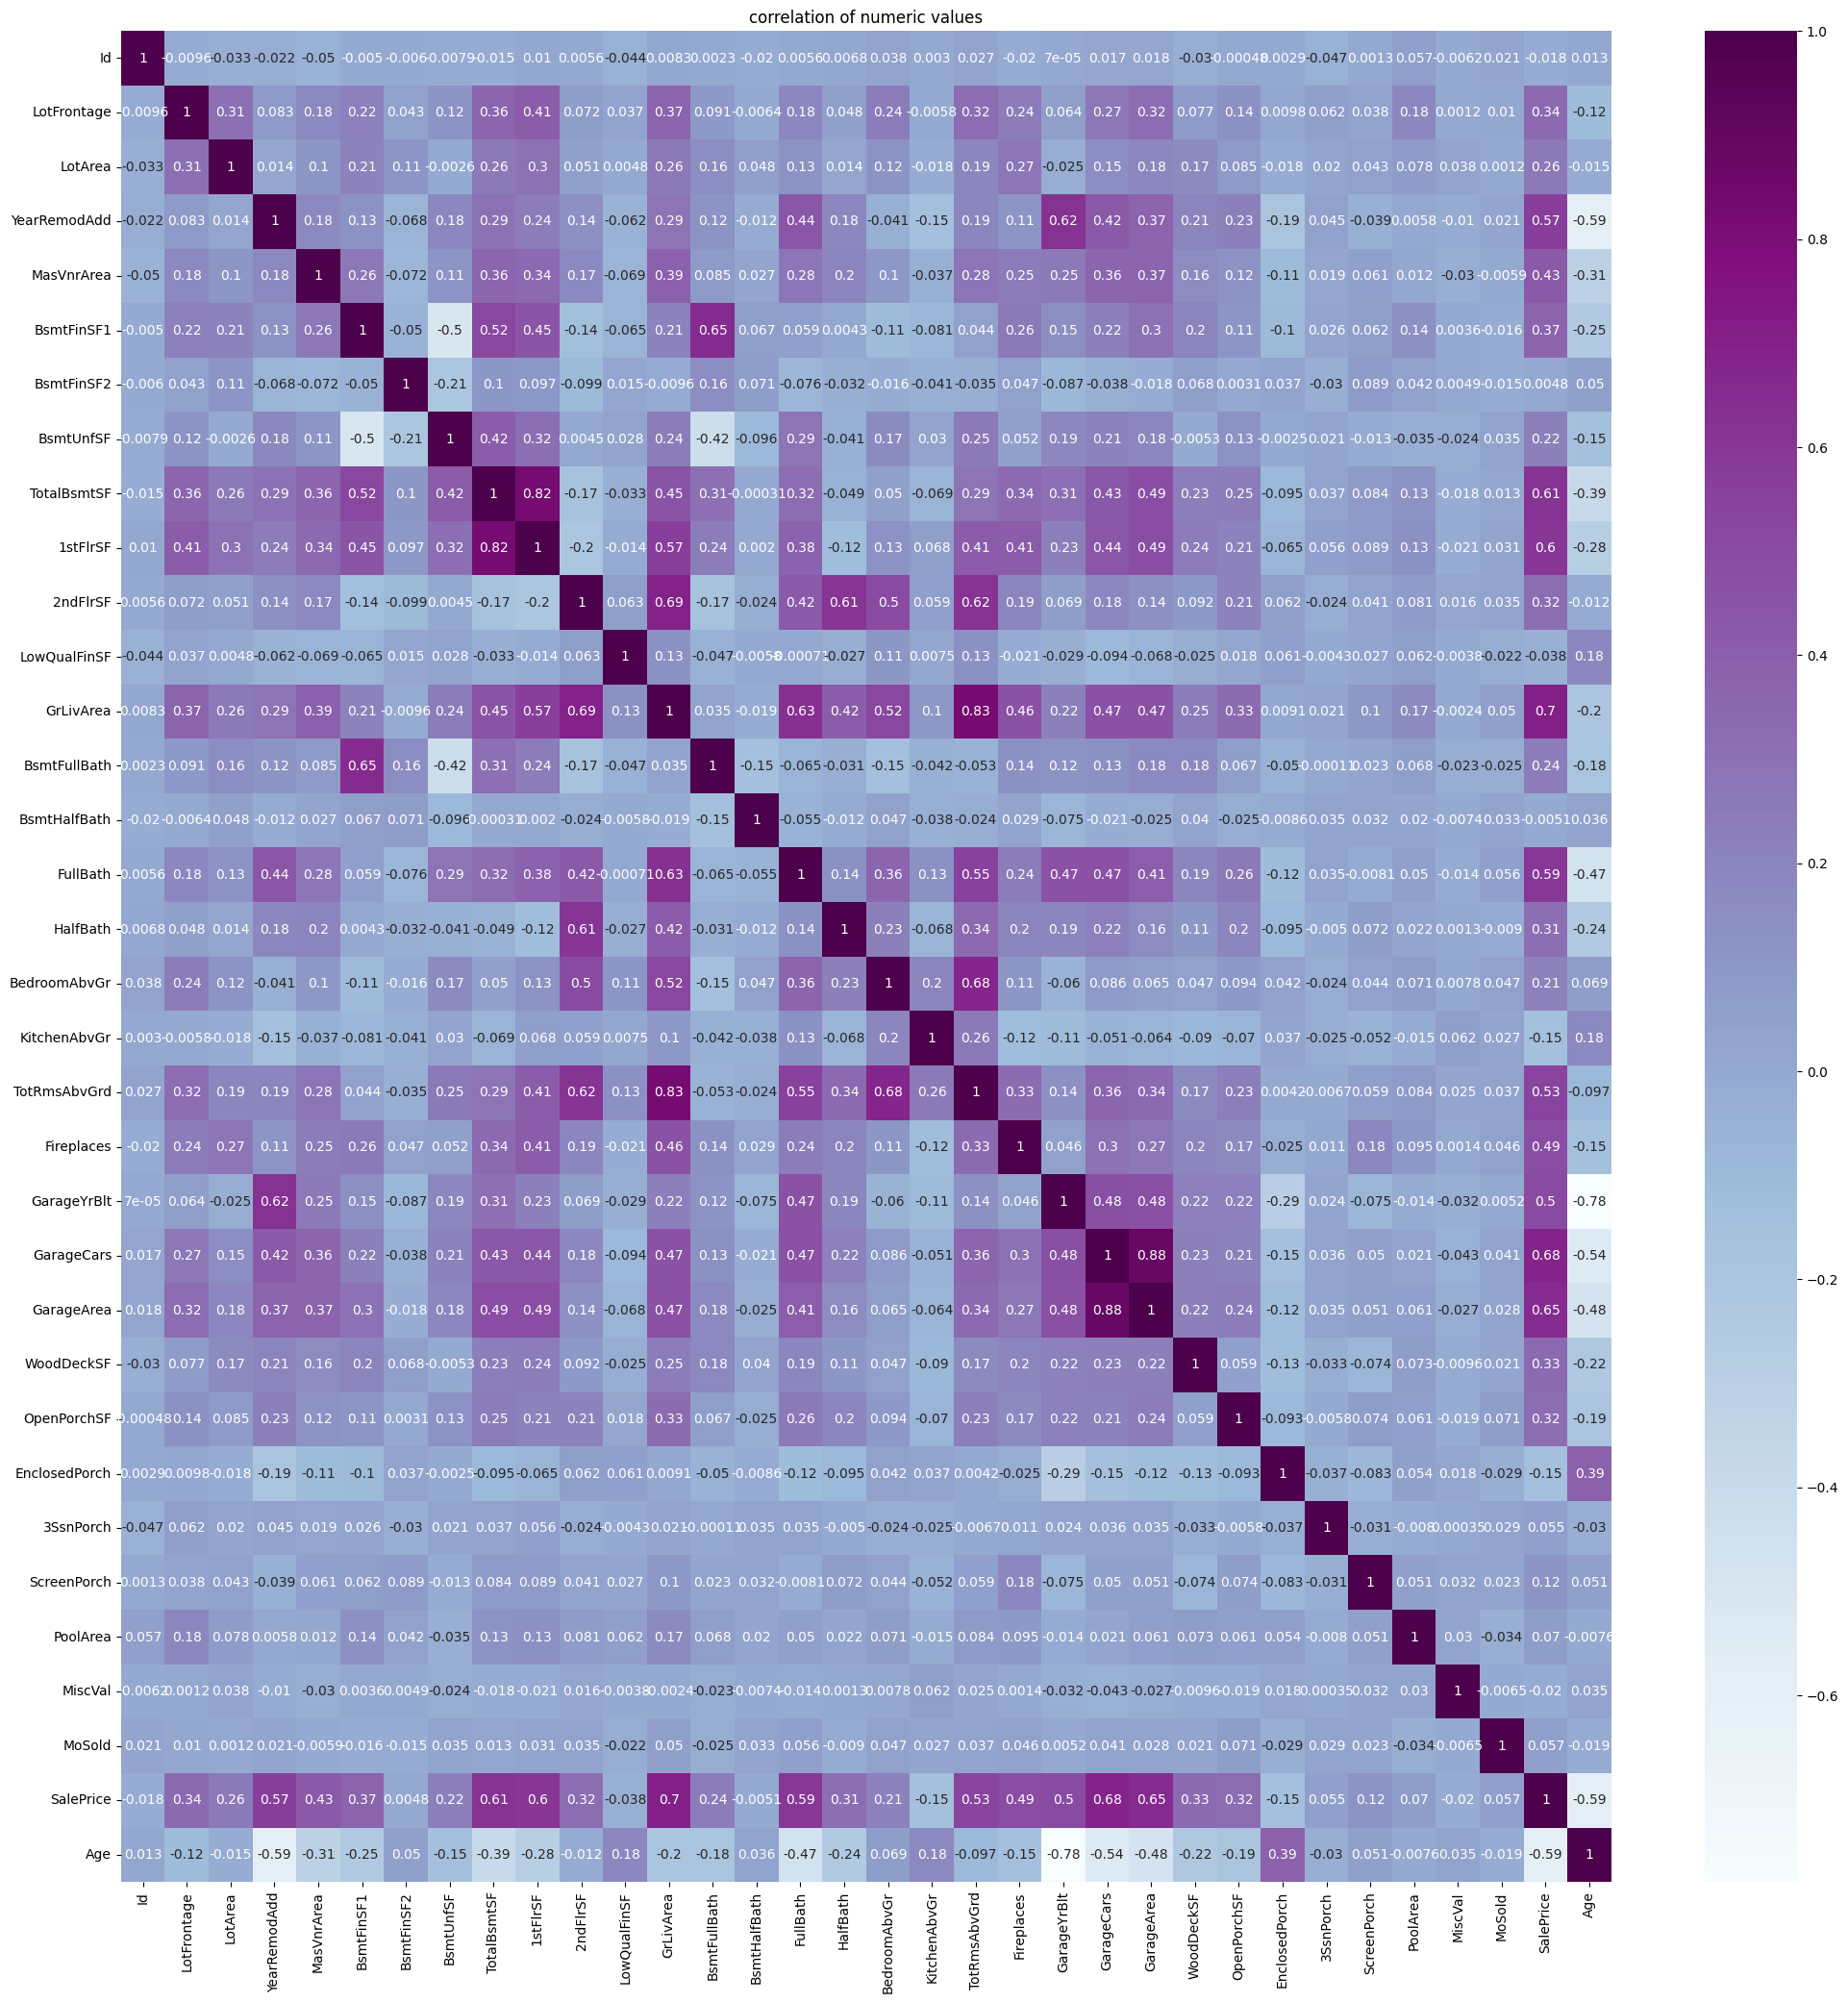

In [32]:
plt.figure(figsize=[25,25])
sns.heatmap(housing.corr(numeric_only=True), annot=True, cmap='BuPu')
plt.title("correlation of numeric values")

### get top 10 correlated columns

<Axes: >

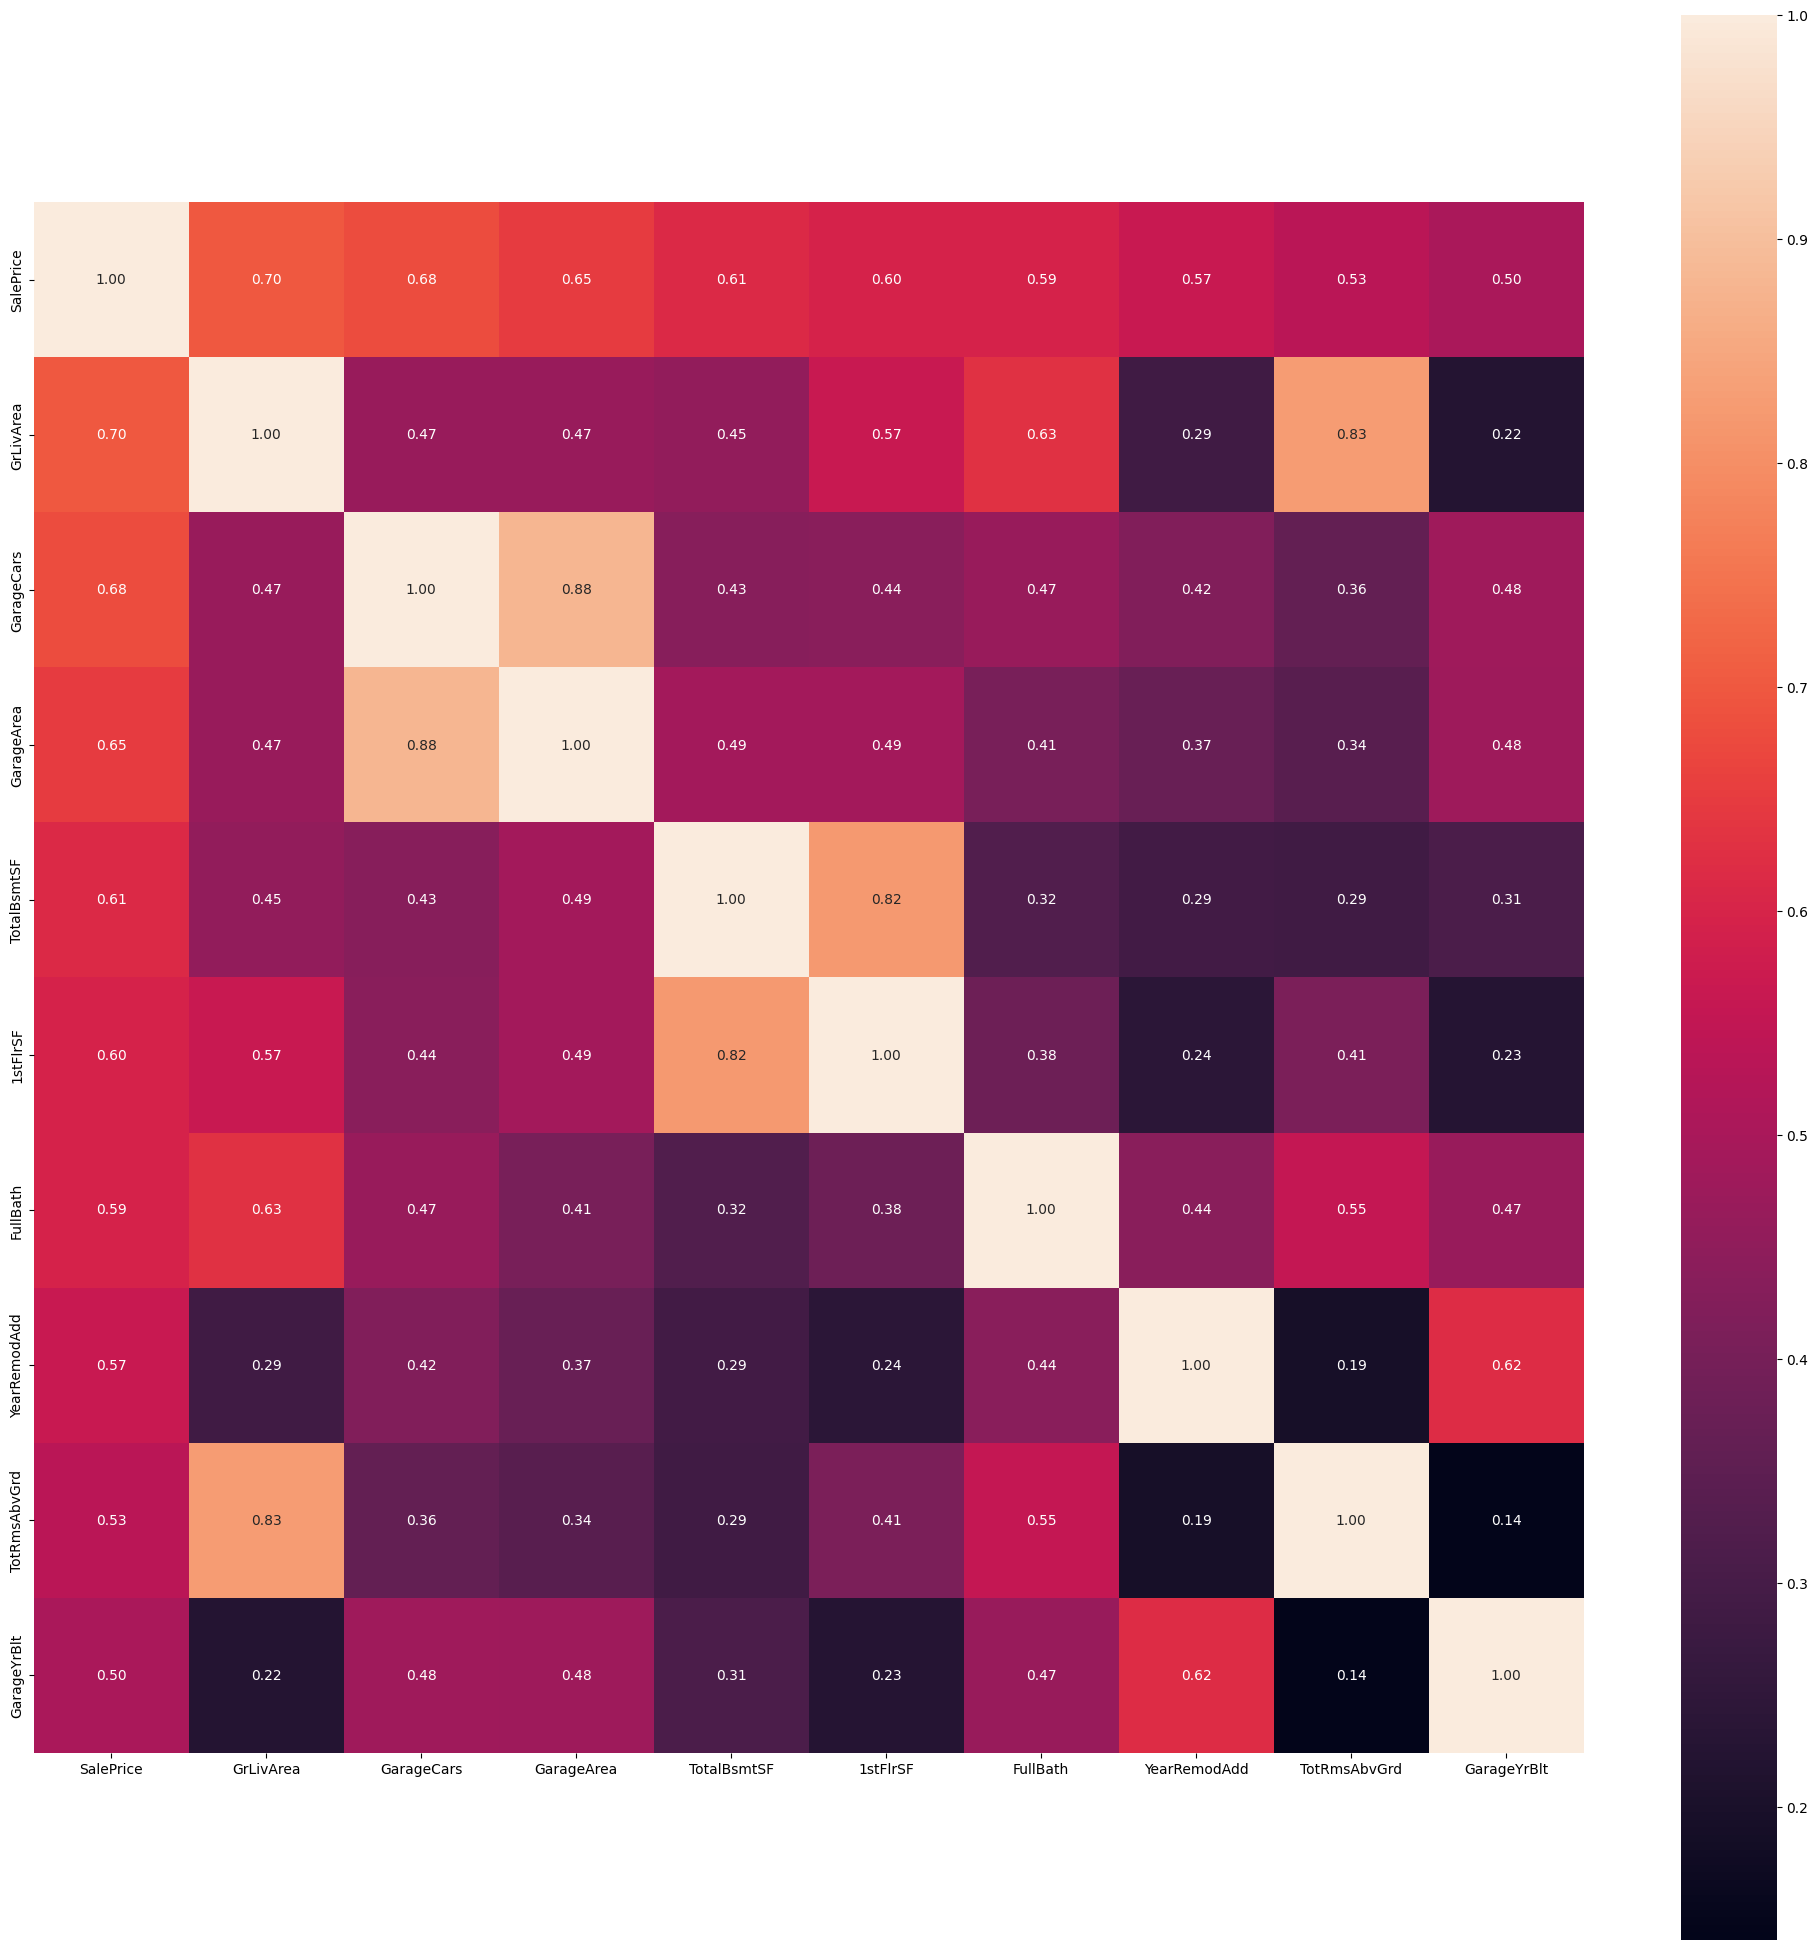

In [33]:
k=10
plt.figure(figsize=[25,25])
cols=housing.corr(numeric_only=True).nlargest(k, 'SalePrice').index
cm=np.corrcoef(housing[cols].values.T)
sns.heatmap(cm, annot=True, square=True, fmt='0.2F', cbar=True, annot_kws={'size': 10},
            yticklabels=cols.values, xticklabels=cols.values)

### observation:
- GarageArea and GarageCars are highly correlated
- GrLivArea and TotRmsAbvGrd are also highly correlated
- TotalBsmtSF and FirstFlrSF are also highly correlated

### pairplot for numeric columns

<Figure size 2000x2000 with 0 Axes>

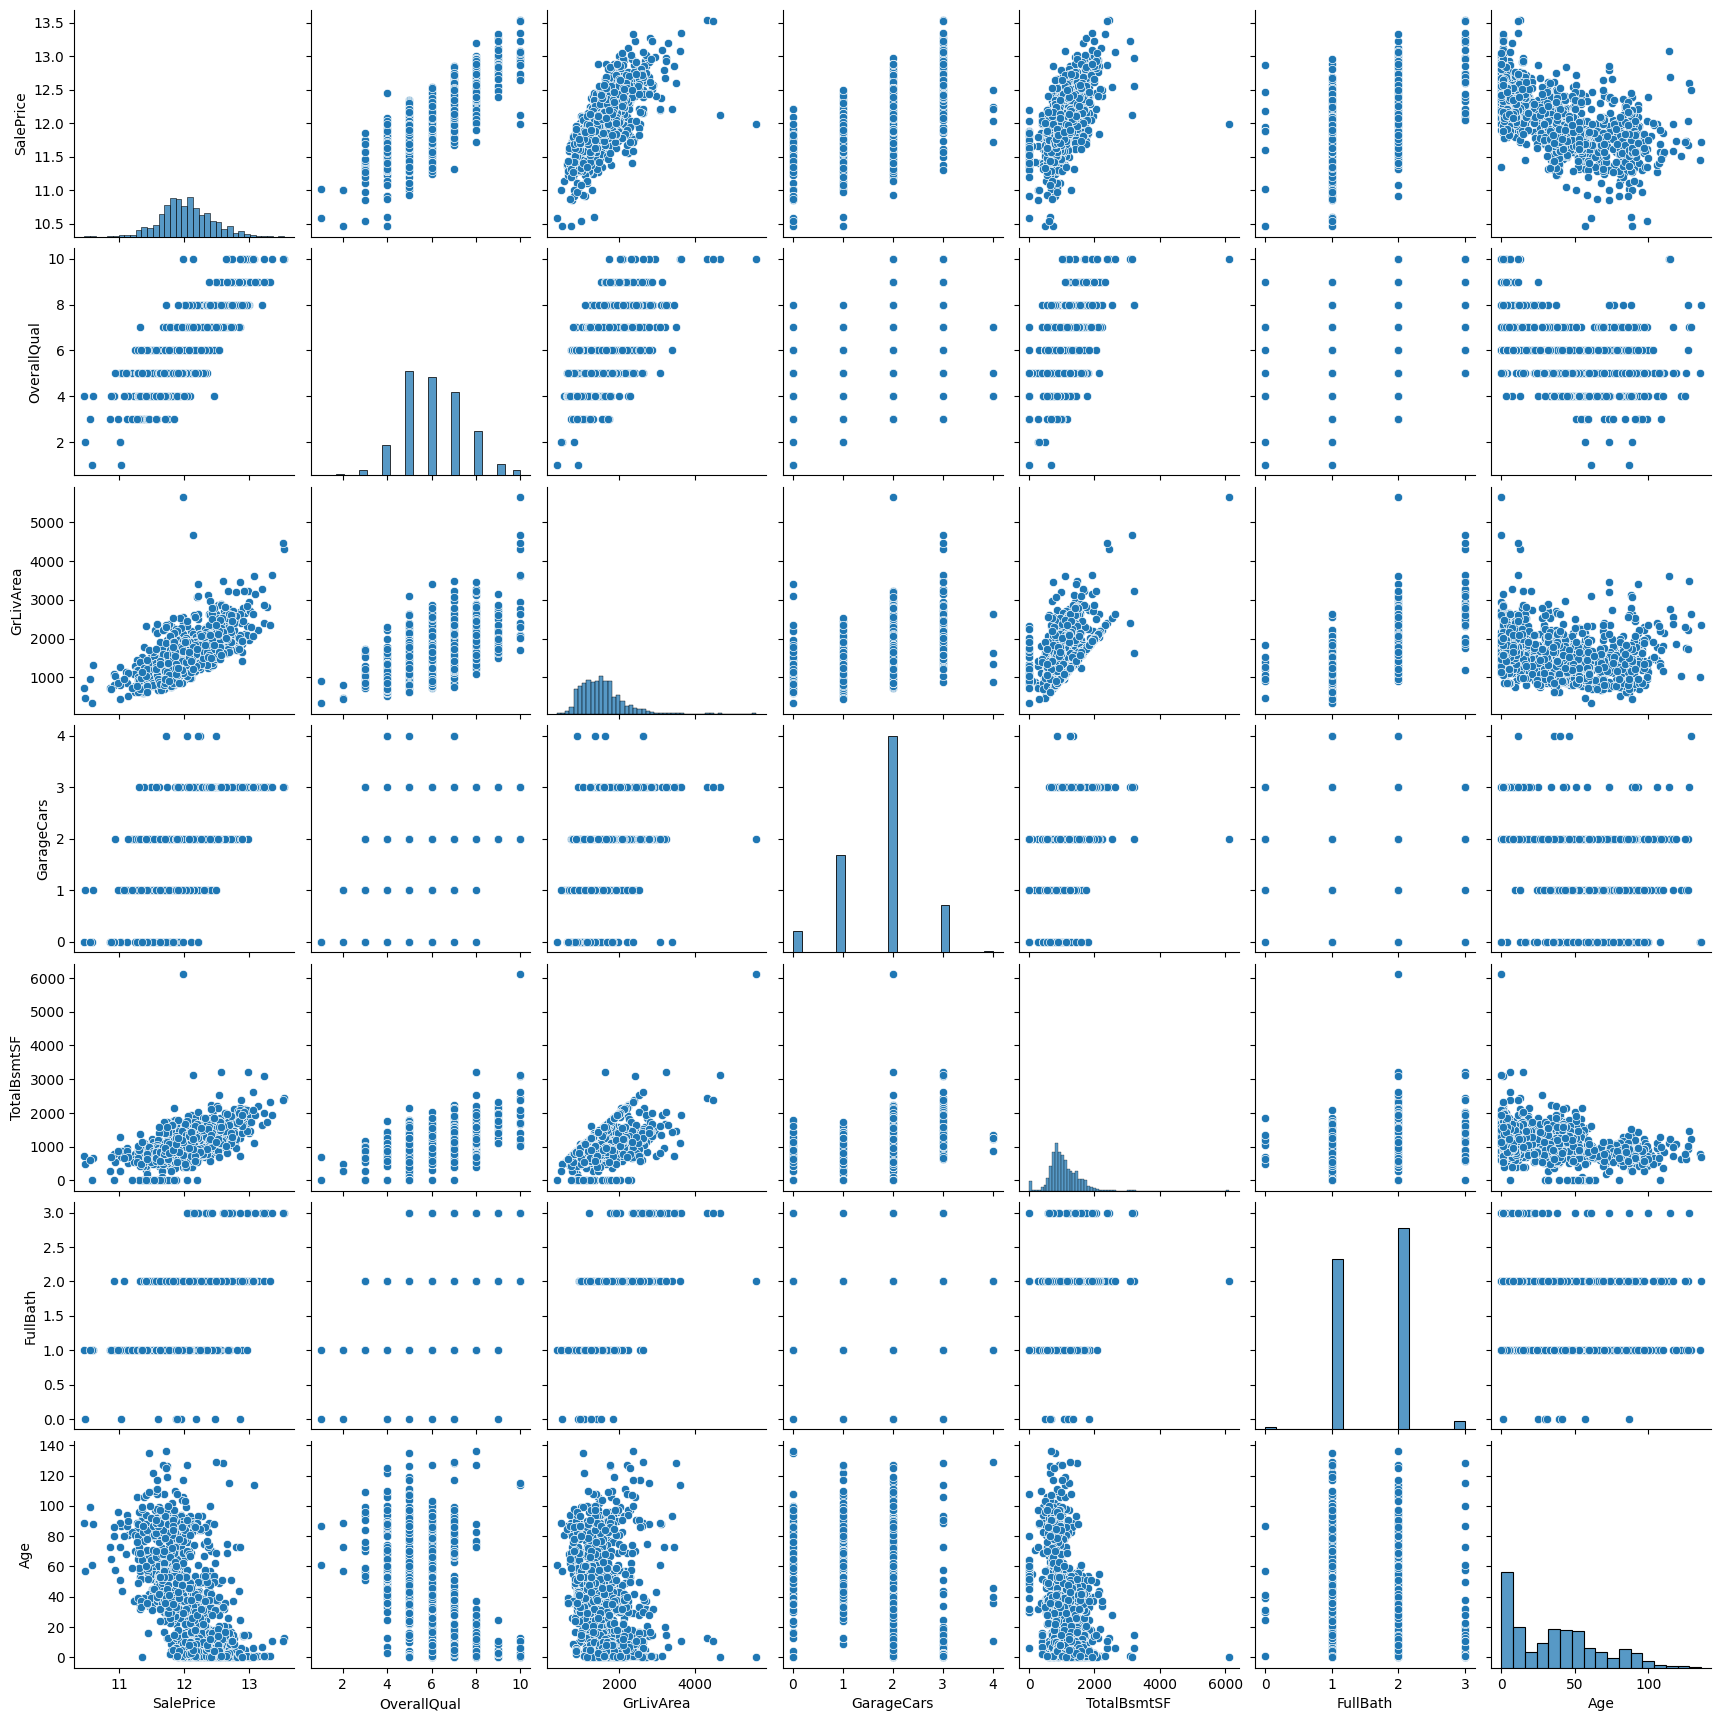

In [34]:
cols=['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'Age']
plt.figure(figsize=[20,20])
sns.pairplot(housing[cols])
plt.show()

#### age has negative correlation with target variable salePrice and TotalBsmtSF and GrLivArea have positive correlation with salePrice

## step-4 Data Encoding

### dummy encoding

In [37]:
housing_num=housing.select_dtypes(include=['int64','float64'])
housing_cat=housing.select_dtypes(include=['object'])

In [38]:
housing_cat_dm=pd.get_dummies(housing_cat, drop_first=True, dtype=int)

In [39]:
house=pd.concat([housing_num, housing_cat_dm], axis=1)

In [40]:
house.head()

Id  LotFrontage  LotArea  YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  \
0   1         65.0     8450          2003       196.0         706           0   
1   2         80.0     9600          1976         0.0         978           0   
2   3         68.0    11250          2002       162.0         486           0   
3   4         60.0     9550          1970         0.0         216           0   
4   5         84.0    14260          2000       350.0         655           0   

   BsmtUnfSF  TotalBsmtSF  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  \
0        150          856       856       854             0       1710   
1        284         1262      1262         0             0       1262   
2        434          920       920       866             0       1786   
3        540          756       961       756             0       1717   
4        490         1145      1145      1053             0       2198   

   BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  \
0             1             0         2         1             3             1   
1             0             1         2         0             3             1   
2             1             0         2         1             3             1   
3             1             0         1         0             3             1   
4             1             0         2         1             4             1   

   TotRmsAbvGrd  Fireplaces  GarageYrBlt  GarageCars  GarageArea  WoodDeckSF  \
0             8           0       2003.0           2         548           0   
1             6           1       1976.0           2         460         298   
2             6           1       2001.0           2         608           0   
3             7           1       1998.0           3         642           0   
4             9           1       2000.0           3         836         192   

   OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  \
0           61              0          0            0         0        0   
1            0              0          0            0         0        0   
2           42              0          0            0         0        0   
3           35            272          0            0         0        0   
4           84              0          0            0         0        0   

   MoSold  SalePrice  Age  MSSubClass_30  MSSubClass_40  MSSubClass_45  \
0       2  12.247694    5              0              0              0   
1       5  12.109011   31              0              0              0   
2       9  12.317167    7              0              0              0   
3       2  11.849398   91              0              0              0   
4      12  12.429216    8              0              0              0   

   MSSubClass_50  MSSubClass_60  MSSubClass_70  MSSubClass_75  MSSubClass_80  \
0              0              1              0              0              0   
1              0              0              0              0              0   
2              0              1              0              0              0   
3              0              0              1              0              0   
4              0              1              0              0              0   

   MSSubClass_85  MSSubClass_90  MSSubClass_120  MSSubClass_160  \
0              0              0               0               0   
1              0              0               0               0   
2              0              0               0               0   
3              0              0               0               0   
4              0              0               0               0   

   MSSubClass_180  MSSubClass_190  MSZoning_FV  MSZoning_RH  MSZoning_RL  \
0               0               0            0            0            1   
1               0               0            0            0            1   
2               0               0            0            0            1   
3            

In [41]:
house.shape

(1460, 286)

In [42]:
# split into target and feature variables
X=house.drop(['SalePrice'], axis=1).copy()
y=house['SalePrice'].copy()

In [43]:
X.head()

Id  LotFrontage  LotArea  YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  \
0   1         65.0     8450          2003       196.0         706           0   
1   2         80.0     9600          1976         0.0         978           0   
2   3         68.0    11250          2002       162.0         486           0   
3   4         60.0     9550          1970         0.0         216           0   
4   5         84.0    14260          2000       350.0         655           0   

   BsmtUnfSF  TotalBsmtSF  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  \
0        150          856       856       854             0       1710   
1        284         1262      1262         0             0       1262   
2        434          920       920       866             0       1786   
3        540          756       961       756             0       1717   
4        490         1145      1145      1053             0       2198   

   BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  \
0             1             0         2         1             3             1   
1             0             1         2         0             3             1   
2             1             0         2         1             3             1   
3             1             0         1         0             3             1   
4             1             0         2         1             4             1   

   TotRmsAbvGrd  Fireplaces  GarageYrBlt  GarageCars  GarageArea  WoodDeckSF  \
0             8           0       2003.0           2         548           0   
1             6           1       1976.0           2         460         298   
2             6           1       2001.0           2         608           0   
3             7           1       1998.0           3         642           0   
4             9           1       2000.0           3         836         192   

   OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  \
0           61              0          0            0         0        0   
1            0              0          0            0         0        0   
2           42              0          0            0         0        0   
3           35            272          0            0         0        0   
4           84              0          0            0         0        0   

   MoSold  Age  MSSubClass_30  MSSubClass_40  MSSubClass_45  MSSubClass_50  \
0       2    5              0              0              0              0   
1       5   31              0              0              0              0   
2       9    7              0              0              0              0   
3       2   91              0              0              0              0   
4      12    8              0              0              0              0   

   MSSubClass_60  MSSubClass_70  MSSubClass_75  MSSubClass_80  MSSubClass_85  \
0              1              0              0              0              0   
1              0              0              0              0              0   
2              1              0              0              0              0   
3              0              1              0              0              0   
4              1              0              0              0              0   

   MSSubClass_90  MSSubClass_120  MSSubClass_160  MSSubClass_180  \
0              0               0               0               0   
1              0               0               0               0   
2              0               0               0               0   
3              0               0               0               0   
4              0               0               0               0   

   MSSubClass_190  MSZoning_FV  MSZoning_RH  MSZoning_RL  MSZoning_RM  \
0               0            0            0            1            0   
1               0            0            0            1            0   
2               0            0            0            1            

In [44]:
y.head()

0    12.247694
1    12.109011
2    12.317167
3    11.849398
4    12.429216
Name: SalePrice, dtype: float64

In [45]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [46]:
x_train, x_test, y_train, y_test=train_test_split(X, y, test_size=0.3, random_state=42)

In [47]:
x_train.shape

(1022, 285)

In [48]:
y_train.shape

(1022,)

In [49]:
# scaling with standardscaler
num_cols=list(x_train.select_dtypes(include=['int64','float64']).columns)

In [50]:
scaler=StandardScaler()
x_train[num_cols]=scaler.fit_transform(x_train[num_cols])
x_test[num_cols]=scaler.fit_transform(x_test[num_cols])

In [51]:
# building a function to calculate evaulation metric
def eval_metrics(y_train, y_train_pred, y_test, y_pred):
    # r2 value
    print("r2 score (train)= ", '%.2f' % r2_score(y_train, y_train_pred))
    print("r2 score (test)= ", '%.2f' % r2_score(y_test, y_pred))
    # RSME 
    mse_train=mean_squared_error(y_train, y_train_pred)
    mse_test=mean_squared_error(y_test, y_pred)
    rmse_train=mse_train**0.5
    rmse_test=mse_test**0.5
    print("RMSE(train)= ", '%.2f' % rmse_train)    
    print("RMSE(test)= ", '%.2f' % rmse_test)

## Final Step :Building the ML model

In [55]:
# Importing machine learning libraries
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import GridSearchCV


In [59]:
# Applying ridge regression with varying the hyperparamater 'Lamda;
params= {'alpha': 
            [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6,
            0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10, 20,
            50, 100, 500, 1000]
        }
ridge=Ridge()
ridgeCV= GridSearchCV(estimator=ridge, param_grid=params, scoring='neg_mean_absolute_error', cv=5,
                     return_train_score=True, verbose=1, n_jobs=-1)
ridgeCV.fit(x_train, y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(), n_jobs=-1,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [60]:
 ridgeCV.best_params_

{'alpha': 100}

In [61]:
ridgeCV.cv_results_

{'mean_fit_time': array([0.09913559, 0.05974021, 0.05108376, 0.07267699, 0.05745201,
        0.11190028, 0.06320324, 0.06524816, 0.05842199, 0.0787982 ,
        0.07084713, 0.05884094, 0.06723795, 0.06250267, 0.0566247 ,
        0.08115988, 0.05774832, 0.05108337, 0.09747133, 0.06219411,
        0.06741991, 0.05713992, 0.05685   , 0.05949855, 0.05637116,
        0.05610228, 0.05720897, 0.05749154]),
 'std_fit_time': array([0.02972978, 0.00771559, 0.00673591, 0.02316749, 0.01142188,
        0.03567773, 0.01281514, 0.01449632, 0.01550572, 0.04903849,
        0.03840181, 0.01251713, 0.02023906, 0.01349016, 0.01487741,
        0.02846937, 0.00532877, 0.00790611, 0.04469817, 0.00978483,
        0.00962159, 0.00804761, 0.0169905 , 0.01294982, 0.01059176,
        0.01892986, 0.01259351, 0.01345416]),
 'mean_score_time': array([0.04089208, 0.02021956, 0.02657022, 0.02233152, 0.02139449,
        0.02324681, 0.02094302, 0.02054672, 0.01753335, 0.01658182,
        0.02139168, 0.02517385, 0.012669

In [62]:
# ridge=Ridge(alpha=9)
ridge=Ridge(alpha=100)

In [63]:
ridge.fit(x_train, y_train)

Ridge(alpha=100)

In [64]:
y_train_pred=ridge.predict(x_train)
y_pred=ridge.predict(x_test)


In [65]:
eval_metrics(y_train, y_train_pred, y_test, y_pred)

r2 score (train)=  0.94
r2 score (test)=  0.88
RMSE(train)=  0.10
RMSE(test)=  0.14


In [66]:
ridgeCV_res=pd.DataFrame(ridgeCV.cv_results_)
ridgeCV_res.head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  param_alpha  \
0       0.099136      0.029730         0.040892        0.029852       0.0001   
1       0.059740      0.007716         0.020220        0.002278       0.0010   
2       0.051084      0.006736         0.026570        0.006440       0.0100   
3       0.072677      0.023167         0.022332        0.014278       0.0500   
4       0.057452      0.011422         0.021394        0.008146       0.1000   

              params  split0_test_score  split1_test_score  split2_test_score  \
0  {'alpha': 0.0001}          -0.088580          -0.118325          -0.105915   
1   {'alpha': 0.001}          -0.088583          -0.118385          -0.105881   
2    {'alpha': 0.01}          -0.088613          -0.118921          -0.105563   
3    {'alpha': 0.05}          -0.088726          -0.120427          -0.104491   
4     {'alpha': 0.1}          -0.088841          -0.121360          -0.103512   

   split3_test_score  split4_test_score  mean_test_score  std_test_score  \
0          -0.092692          -0.105870        -0.102276        0.010613   
1          -0.092680          -0.105841        -0.102274        0.010628   
2          -0.092583          -0.105564        -0.102249        0.010764   
3          -0.092316          -0.104476        -0.102087        0.011152   
4          -0.092113          -0.103480        -0.101861        0.011403   

   rank_test_score  split0_train_score  split1_train_score  \
0               28           -0.059814           -0.052776   
1               27           -0.059816           -0.052778   
2               26           -0.059837           -0.052792   
3               25           -0.059926           -0.052837   
4               23           -0.060024           -0.052873   

   split2_train_score  split3_train_score  split4_train_score  \
0           -0.052850           -0.057471           -0.059161   
1           -0.052855           -0.057475           -0.059163   
2           -0.052897           -0.057508           -0.059180   
3           -0.053038           -0.057643           -0.059255   
4           -0.053169           -0.057787           -0.059358   

   mean_train_score  std_train_score  
0         -0.056415         0.003038  
1         -0.056417         0.003038  
2         -0.056443         0.003035  
3         -0.056540         0.003034  
4         -0.056642         0.003046

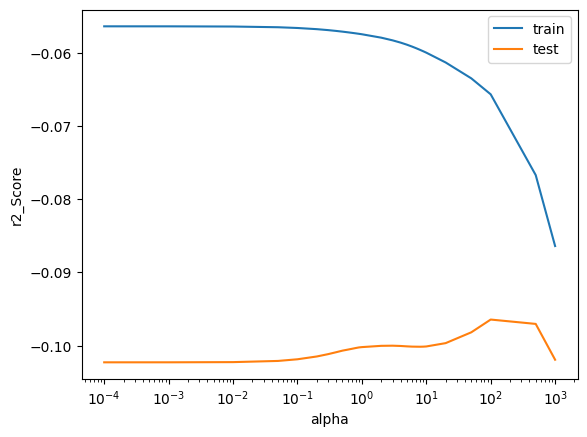

In [67]:
plt.plot(ridgeCV_res['param_alpha'], ridgeCV_res['mean_train_score'], label='train')
plt.plot(ridgeCV_res['param_alpha'], ridgeCV_res['mean_test_score'], label='test')
plt.xlabel('alpha')
plt.ylabel('r2_Score')
plt.xscale('log')
plt.legend()
plt.show()

In [68]:
# Applying lasso regression with varying the hyperparamater 'Lamda;
lasso=Lasso()
lassoCV= GridSearchCV(estimator=lasso, param_grid=params, scoring='neg_mean_absolute_error', cv=5,
                     return_train_score=True, verbose=1, n_jobs=-1)
lassoCV.fit(x_train, y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(), n_jobs=-1,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [69]:
lassoCV.best_params_

{'alpha': 0.001}

In [70]:
# lasso=Lasso(alpha=0.0001)
lasso=Lasso(alpha=0.001)
lasso.fit(x_train, y_train)

Lasso(alpha=0.001)

In [71]:
lasso.coef_

array([-0.00000000e+00,  2.89430958e-03,  1.43305831e-02,  2.02745841e-02,
        5.61776271e-03,  9.46745099e-03,  3.63922229e-03, -0.00000000e+00,
        2.83916923e-02,  0.00000000e+00,  0.00000000e+00,  1.11251738e-03,
        1.01329217e-01,  1.61035180e-02, -0.00000000e+00,  1.48386130e-02,
        1.27296514e-02,  2.04550363e-03, -1.91010646e-02,  1.68155746e-02,
        1.48303973e-02, -0.00000000e+00,  2.14177153e-02,  2.12237213e-02,
        1.08200792e-02,  0.00000000e+00,  5.87518344e-03,  6.20303416e-03,
        1.26514839e-02,  2.24151689e-01, -0.00000000e+00,  9.97867152e-04,
       -5.34076733e-02, -1.63085572e-02,  2.54043006e-04, -0.00000000e+00,
        0.00000000e+00, -5.28292317e-03,  3.37721417e-03,  1.23225924e-03,
       -2.81706160e-03, -0.00000000e+00, -5.00709106e-03, -0.00000000e+00,
       -1.81164819e-02, -1.50081255e-03, -0.00000000e+00,  8.84272552e-03,
        1.16117845e-03,  8.69227220e-03, -0.00000000e+00,  1.14097732e-03,
       -2.33972421e-03,  

In [72]:
y_train_pred1=ridge.predict(x_train)
y_pred1=ridge.predict(x_test)


In [73]:
eval_metrics(y_train, y_train_pred1, y_test, y_pred1)

r2 score (train)=  0.94
r2 score (test)=  0.88
RMSE(train)=  0.10
RMSE(test)=  0.14


In [74]:
lassoCV_res=pd.DataFrame(lassoCV.cv_results_)
lassoCV_res.head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  param_alpha  \
0       0.564719      0.053512         0.020385        0.000513       0.0001   
1       0.345907      0.172775         0.019360        0.005109       0.0010   
2       0.072524      0.012013         0.024004        0.003806       0.0100   
3       0.073707      0.016248         0.019940        0.006165       0.0500   
4       0.050317      0.009820         0.028645        0.007578       0.1000   

              params  split0_test_score  split1_test_score  split2_test_score  \
0  {'alpha': 0.0001}          -0.088543          -0.121677          -0.096412   
1   {'alpha': 0.001}          -0.083840          -0.110003          -0.095309   
2    {'alpha': 0.01}          -0.092087          -0.120770          -0.102331   
3    {'alpha': 0.05}          -0.128277          -0.152116          -0.152376   
4     {'alpha': 0.1}          -0.165457          -0.180370          -0.198334   

   split3_test_score  split4_test_score  mean_test_score  std_test_score  \
0          -0.089930          -0.098292        -0.098971        0.011942   
1          -0.085516          -0.094536        -0.093841        0.009308   
2          -0.092058          -0.095858        -0.100621        0.010749   
3          -0.132331          -0.117330        -0.136486        0.013773   
4          -0.164497          -0.150110        -0.171753        0.016380   

   rank_test_score  split0_train_score  split1_train_score  \
0                2           -0.061142           -0.053327   
1                1           -0.066148           -0.057313   
2                3           -0.089610           -0.078877   
3                4           -0.133942           -0.118967   
4                5           -0.173369           -0.157793   

   split2_train_score  split3_train_score  split4_train_score  \
0           -0.054444           -0.059079           -0.060608   
1           -0.059642           -0.064916           -0.064160   
2           -0.086721           -0.090646           -0.082688   
3           -0.132201           -0.134729           -0.135172   
4           -0.172191           -0.171152           -0.172841   

   mean_train_score  std_train_score  
0         -0.057720         0.003223  
1         -0.062436         0.003375  
2         -0.085708         0.004391  
3         -0.131002         0.006102  
4         -0.169469         0.005885

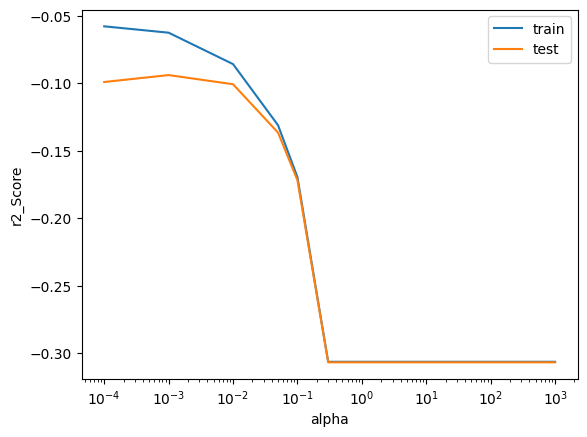

In [75]:
plt.plot(lassoCV_res['param_alpha'], lassoCV_res['mean_train_score'], label='train')
plt.plot(lassoCV_res['param_alpha'], lassoCV_res['mean_test_score'], label='test')
plt.xlabel('alpha')
plt.ylabel('r2_Score')
plt.xscale('log')
plt.legend()
plt.show()

## Feature Extraction/ elimination

In [77]:
betas=pd.DataFrame(index=X.columns) 
betas.rows=X.columns
betas['Ridge']=ridge.coef_
betas['Lasso']=lasso.coef_
betas

Ridge         Lasso
Id                    -0.001188 -0.000000e+00
LotFrontage            0.000433  2.894310e-03
LotArea                0.016147  1.433058e-02
YearRemodAdd           0.018356  2.027458e-02
MasVnrArea             0.008070  5.617763e-03
BsmtFinSF1             0.008252  9.467451e-03
BsmtFinSF2             0.006491  3.639222e-03
BsmtUnfSF              0.003300 -0.000000e+00
TotalBsmtSF            0.013966  2.839169e-02
1stFlrSF               0.026714  0.000000e+00
2ndFlrSF               0.023319  0.000000e+00
LowQualFinSF           0.004311  1.112517e-03
GrLivArea              0.039361  1.013292e-01
BsmtFullBath           0.014509  1.610352e-02
BsmtHalfBath          -0.001800 -0.000000e+00
FullBath               0.021295  1.483861e-02
HalfBath               0.017979  1.272965e-02
BedroomAbvGr           0.009095  2.045504e-03
KitchenAbvGr          -0.013321 -1.910106e-02
TotRmsAbvGrd           0.022753  1.681557e-02
Fireplaces             0.014050  1.483040e-02
GarageYrBlt            0.003031 -0.000000e+00
GarageCars             0.026326  2.141772e-02
GarageArea             0.018107  2.122372e-02
WoodDeckSF             0.012927  1.082008e-02
OpenPorchSF            0.001723  0.000000e+00
EnclosedPorch          0.004405  5.875183e-03
3SsnPorch              0.007044  6.203034e-03
ScreenPorch            0.012565  1.265148e-02
PoolArea               0.023757  2.241517e-01
MiscVal                0.001204 -0.000000e+00
MoSold                 0.004087  9.978672e-04
Age                   -0.026911 -5.340767e-02
MSSubClass_30         -0.018908 -1.630856e-02
MSSubClass_40          0.001530  2.540430e-04
MSSubClass_45         -0.002892 -0.000000e+00
MSSubClass_50          0.001707  0.000000e+00
MSSubClass_60         -0.001209 -5.282923e-03
MSSubClass_70          0.006062  3.377214e-03
MSSubClass_75          0.002340  1.232259e-03
MSSubClass_80         -0.005518 -2.817062e-03
MSSubClass_85         -0.001657 -0.000000e+00
MSSubClass_90         -0.005615 -5.007091e-03
MSSubClass_120        -0.005598 -0.000000e+00
MSSubClass_160        -0.018121 -1.811648e-02
MSSubClass_180        -0.004093 -1.500813e-03
MSSubClass_190        -0.001099 -0.000000e+00
MSZoning_FV            0.009769  8.842726e-03
MSZoning_RH            0.003386  1.161178e-03
MSZoning_RL            0.012352  8.692272e-03
MSZoning_RM            0.001237 -0.000000e+00
Street_Pave            0.001567  1.140977e-03
Alley_None            -0.003268 -2.339724e-03
Alley_Pave             0.011036  1.204557e-02
LotShape_IR2           0.004908  4.513869e-03
LotShape_IR3          -0.004303 -0.000000e+00
LotShape_Reg          -0.000892  0.000000e+00
LandContour_HLS        0.011592  9.058198e-03
LandContour_Low        0.000664 -0.000000e+00
LandContour_Lvl        0.014049  1.147893e-02
Utilities_NoSeWa      -0.007457 -5.199141e-03
LotConfig_CulDSac      0.009419  8.899609e-03
LotConfig_FR2         -0.007735 -5.164167e-03
LotConfig_FR3         -0.005365 -4.506903e-03
LotConfig_Inside      -0.004853 -3.018835e-03
LandSlope_Mod         -0.002441 -2.930991e-03
LandSlope_Sev         -0.002111 -0.000000e+00
Neighborhood_Blueste  -0.001779 -1.225555e-04
Neighborhood_BrDale   -0.001084  0.000000e+00
Neighborhood_BrkSide   0.002074  3.247233e-03
Neighborhood_ClearCr   0.008265  9.546488e-03
Neighborhood_CollgCr  -0.002064  0.000000e+00
Neighborhood_Crawfor   0.019419  2.193488e-02
Neighborhood_Edwards  -0.012756 -8.871964e-03
Neighborhood_Gilbert  -0.003290 -0.000000e+00
Neighborhood_IDOTRR   -0.009838 -7.603245e-03
Neighborhood_MeadowV  -0.018094 -1.640213e-02
Neighborhood_Mitchel  -0.001308 -0.000000e+00
Neighborhood_NAmes    -0.010969 -4.972746e-03
Neighborhood_NPkVill   0.003612  4.482020e-03
Neighborhood_NWAmes   -0.004453 -1.318642e-03
Neighborhood_NoRidge   0.012219  8.873318e-03
Neighborhood_NridgHt   0.022188  2.104542e-02
Neighborhood_OldTown  -0.012244 -9.110023e-03
Neighborhood_SWISU     0.000889  2.018419e-03
Neighborhood_Sawyer   -0.003561 -6.391670e-05
Neighborhood_SawyerW  -0

In [78]:
lasso_cols_removed=list(betas[betas['Lasso']==0].index)
lasso_cols_removed

['Id',
 'BsmtUnfSF',
 '1stFlrSF',
 '2ndFlrSF',
 'BsmtHalfBath',
 'GarageYrBlt',
 'OpenPorchSF',
 'MiscVal',
 'MSSubClass_45',
 'MSSubClass_50',
 'MSSubClass_85',
 'MSSubClass_120',
 'MSSubClass_190',
 'MSZoning_RM',
 'LotShape_IR3',
 'LotShape_Reg',
 'LandContour_Low',
 'LandSlope_Sev',
 'Neighborhood_BrDale',
 'Neighborhood_CollgCr',
 'Neighborhood_Gilbert',
 'Neighborhood_Mitchel',
 'Neighborhood_SawyerW',
 'Condition2_Norm',
 'Condition2_PosA',
 'Condition2_RRAn',
 'Condition2_RRNn',
 'BldgType_2fmCon',
 'HouseStyle_2.5Fin',
 'HouseStyle_SLvl',
 'OverallQual_6',
 'OverallCond_6',
 'RoofStyle_Hip',
 'RoofMatl_CompShg',
 'RoofMatl_Membran',
 'RoofMatl_WdShake',
 'Exterior1st_AsphShn',
 'Exterior1st_CemntBd',
 'Exterior1st_ImStucc',
 'Exterior1st_Plywood',
 'Exterior1st_VinylSd',
 'Exterior2nd_Brk Cmn',
 'Exterior2nd_CBlock',
 'Exterior2nd_HdBoard',
 'Exterior2nd_MetalSd',
 'Exterior2nd_Stucco',
 'Exterior2nd_VinylSd',
 'Exterior2nd_Wd Shng',
 'MasVnrType_BrkFace',
 'ExterQual_Gd',
 'E

In [79]:
lasso_cols_selected=list(betas[betas['Lasso']!=0].index)
lasso_cols_selected

['LotFrontage',
 'LotArea',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'TotalBsmtSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MoSold',
 'Age',
 'MSSubClass_30',
 'MSSubClass_40',
 'MSSubClass_60',
 'MSSubClass_70',
 'MSSubClass_75',
 'MSSubClass_80',
 'MSSubClass_90',
 'MSSubClass_160',
 'MSSubClass_180',
 'MSZoning_FV',
 'MSZoning_RH',
 'MSZoning_RL',
 'Street_Pave',
 'Alley_None',
 'Alley_Pave',
 'LotShape_IR2',
 'LandContour_HLS',
 'LandContour_Lvl',
 'Utilities_NoSeWa',
 'LotConfig_CulDSac',
 'LotConfig_FR2',
 'LotConfig_FR3',
 'LotConfig_Inside',
 'LandSlope_Mod',
 'Neighborhood_Blueste',
 'Neighborhood_BrkSide',
 'Neighborhood_ClearCr',
 'Neighborhood_Crawfor',
 'Neighborhood_Edwards',
 'Neighborhood_IDOTRR',
 'Neighborhood_MeadowV',
 'Neighborhood_NAmes',

In [87]:
print(len(lasso_cols_removed))
print(len(lasso_cols_selected))

80
205


In [88]:
betas['Ridge'].sort_values(ascending=False)[: 10]

GrLivArea               0.039361
OverallQual_9           0.028307
1stFlrSF                0.026714
GarageCars              0.026326
OverallQual_8           0.025355
PoolArea                0.023757
RoofMatl_Tar&Grv        0.023421
2ndFlrSF                0.023319
TotRmsAbvGrd            0.022753
Neighborhood_NridgHt    0.022188
Name: Ridge, dtype: float64

# Hence we see that with both Ridge and Lasso regression we are able to get test and train score. We can use either for the final model